# Final fits for MS w/best SAmod params and BME

## Fit and BME for conformations backmapped from combined trj --- eq 0.5 µs

## Theta = 500 -- For AA confs taken from combined trj w/o first 0.5 µs

In [3]:
import sys 
import os 
import glob
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import scipy
import scipy.stats
import matplotlib.ticker as ticker
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter, FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from gridData import Grid 
from io import StringIO
from collections import Counter
from scipy import stats
from scipy.stats import norm
from  scipy.stats import gaussian_kde
#from sklearn.neighbors import KernelDensity
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from pylab import *
from matplotlib.ticker import NullFormatter
from matplotlib import font_manager


##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['pdf.fonttype'] = 42 

In [4]:
## Format SAXS-WIF fits for BME w/o poly-fit

import re
import natsort 
fits2 = []

#Fits

fits1=[]
files1 = glob.glob('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/Data_eq0d5_comb/AA_frame_ae*-GHR_ND.card-results/fit1.dat')
files1_sorted=natsort.natsorted(files1,reverse=False)

for num1, file1 in enumerate(files1_sorted):

    fits1.append(np.genfromtxt(file1, usecols=1)) ;# skip_footer=10 
array1=np.array(fits1)
#print (array)
sim_data_transp = np.transpose(array1)
print (sim_data_transp[0,:])

#print (array1[:,0])

np.savetxt('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/sim_raw_eq0d5us_comb.dat',array1, delimiter = ' ',fmt='%s')


     #data = np.array([[float(x) for x in line.split()[1:]] for line in open(filename) if("#" not in line)])
data = np.array([[float(x) for x in line.split()[0:]] for line in open('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/sim_raw_eq0d5us_comb.dat') if("#" not in line)])

print (data.shape)
    

[0.0107957 0.0108405 0.0107473 ... 0.0111637 0.0110686 0.0110265]
(6004, 91)


# Warning: expt average             0.007273=1.1958e-02 is larger than maximum value in simulation 1.1597e-02
# Warning: expt average             0.057370=6.3900e-04 is smaller than minimum value in simulation 6.6671e-04
# Warning: expt average             0.195373=1.6500e-04 is smaller than minimum value in simulation 1.7238e-04
# Warning: expt average             0.249251=1.3400e-04 is smaller than minimum value in simulation 1.3486e-04
# Warning: expt average             0.259412=1.3000e-04 is smaller than minimum value in simulation 1.3265e-04
# Warning: expt average             0.270046=1.4600e-04 is larger than maximum value in simulation 1.3930e-04
# Warning: expt average             0.281152=1.2900e-04 is smaller than minimum value in simulation 1.2941e-04
# Warning: expt average             0.292731=1.2200e-04 is smaller than minimum value in simulation 1.2862e-04
# Warning: expt average             0.304783=1.3900e-04 is larger than maximum value in simulation 1.3496e-04
# Wa

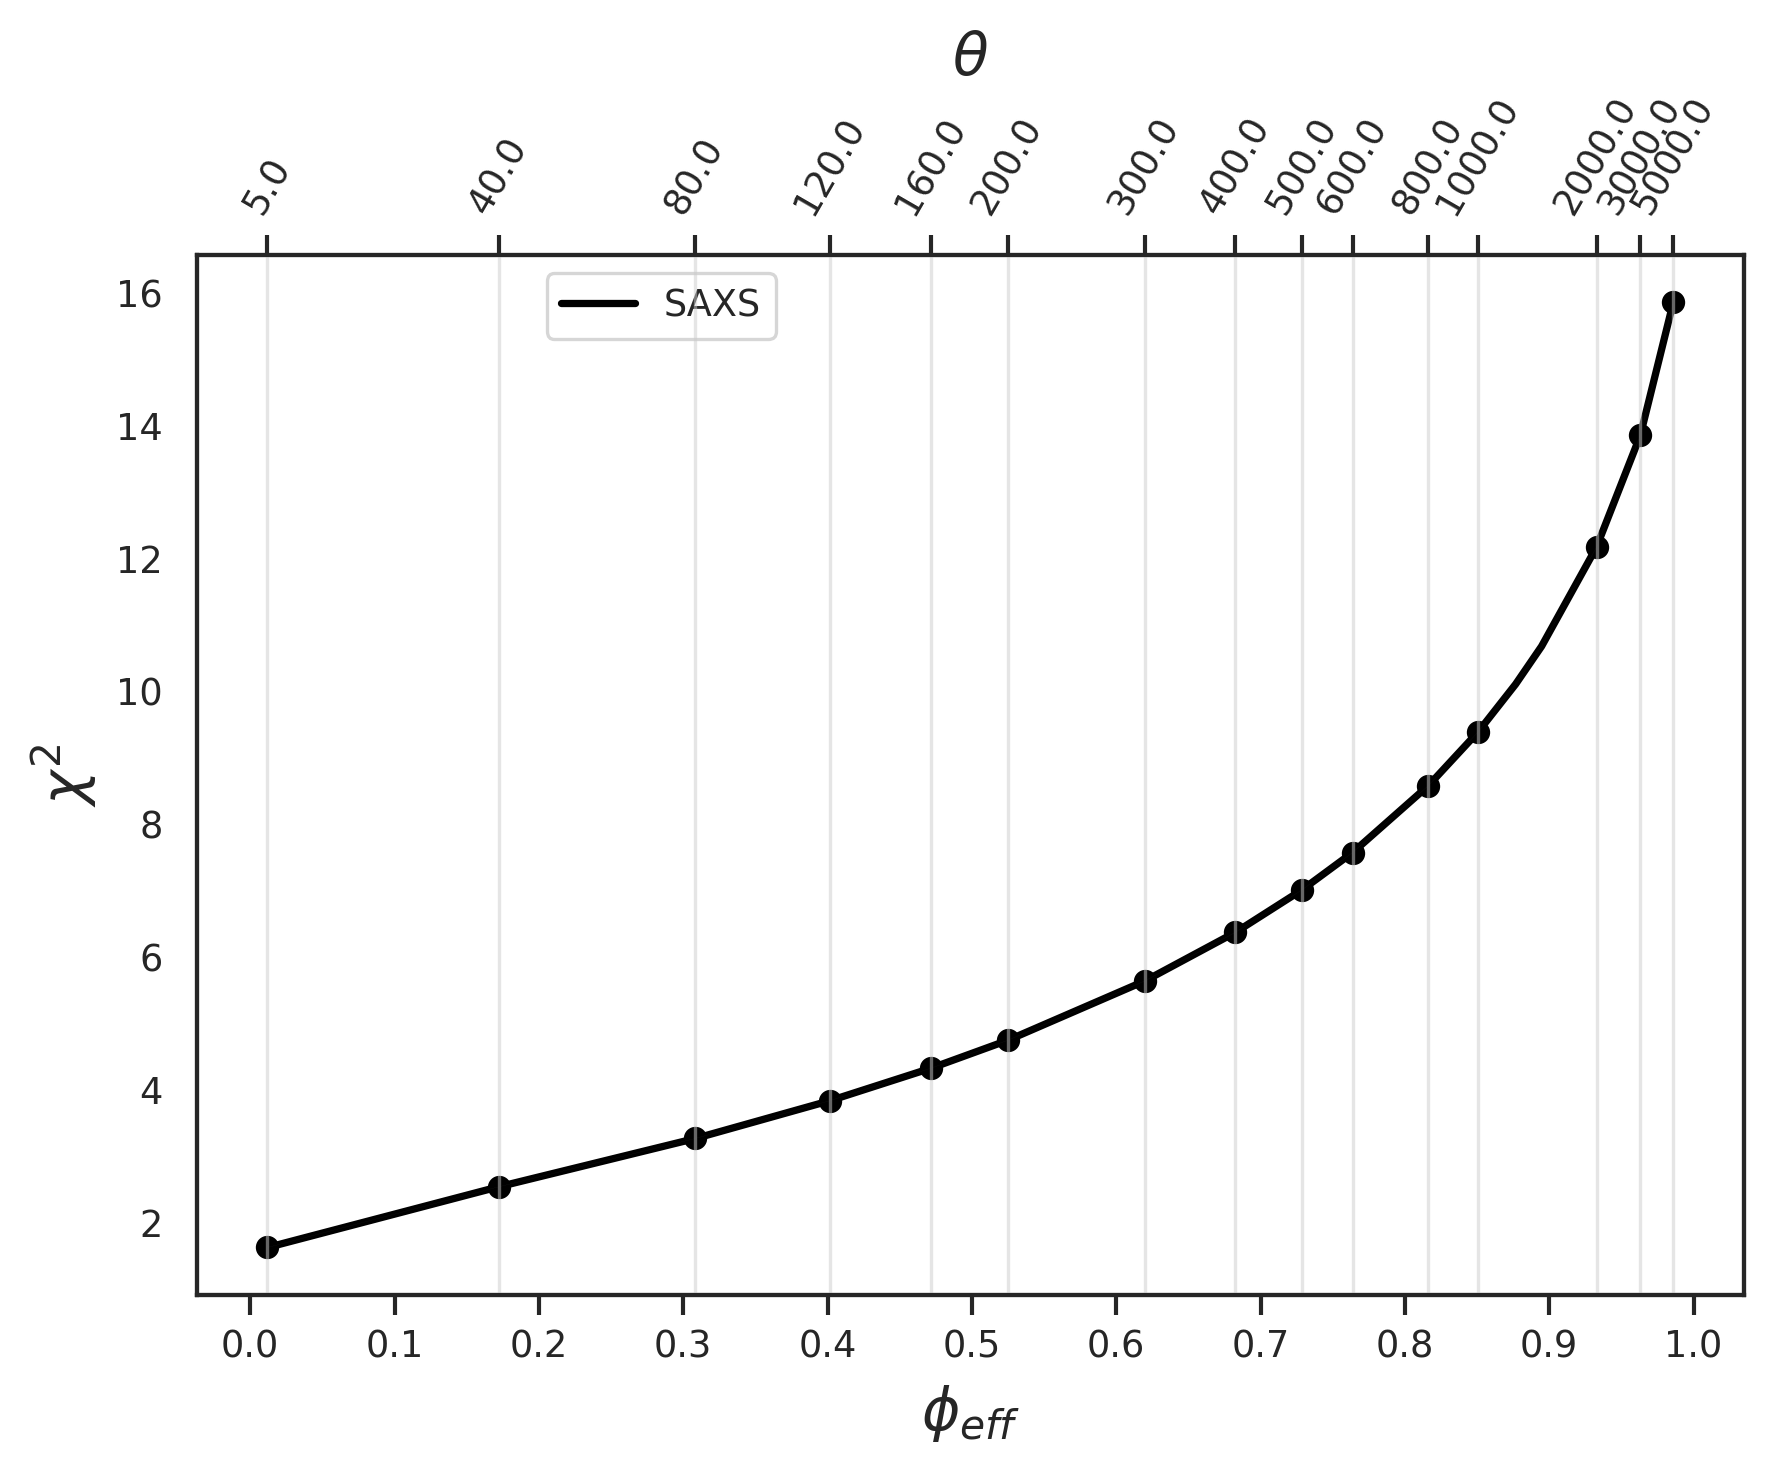

# theta: 500
# CHI2_re before minimization:      19.4037
# CHI2_re after minimization:        7.0027
# Fraction of effective frames:      0.7286


In [5]:
## BME Rew

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
mpl.rcParams.update({'font.size': 14})
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/GHR_SP_ECD_TMD_ICD_GFPpws10_Rg.dat',usecols=0)
#print(Rg)
#RgExp =29
#RgExpe =0.09

exp_saxs = '/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/EXP.dat'
calc_saxs = '/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/sim_raw_eq0d5us_comb.dat'

### initialize reweighting class
rew = bme.Reweight()

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [5.,40.,80.,120.,160.,200.,300.,400.,500.,600.,800.,1000.,1200.,1400.,2000.,3000.,5000.]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 5))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [5,40,80,120,160,200,300,400,500,600,800,1000,2000,3000,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$\phi_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/Theta_500_Neff_eq0d5us_comb.pdf', format = 'pdf')
plt.show()

# select theta=300
chi2_before,chi2_after, srel = rew.optimize(theta=500)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

In [6]:
##### Block averaging and plot figure

### Set bins for block average and optimal theta to use
### Set bins for block average and optimal theta to use
n_frames = len(Rg)
n_bins =5
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=500

print("n_frames {:8.4f}".format(n_frames))
print("bin_size {:8.4f}".format(bin_size))

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/example_eq5d5us_combX_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/example_eq5d5us_combX_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()
    

n_frames 6004.0000
bin_size 1200.0000
# Warning: expt average             0.007273=1.1958e-02 is larger than maximum value in simulation 1.1500e-02
# Warning: expt average             0.057370=6.3900e-04 is smaller than minimum value in simulation 6.8255e-04
# Warning: expt average             0.195373=1.6500e-04 is smaller than minimum value in simulation 1.7238e-04
# Warning: expt average             0.203644=1.9900e-04 is larger than maximum value in simulation 1.9220e-04
# Warning: expt average             0.212151=1.5600e-04 is smaller than minimum value in simulation 1.5806e-04
# Warning: expt average             0.239562=1.5200e-04 is larger than maximum value in simulation 1.5072e-04
# Warning: expt average             0.249251=1.3400e-04 is smaller than minimum value in simulation 1.3571e-04
# Warning: expt average             0.259412=1.3000e-04 is smaller than minimum value in simulation 1.3274e-04
# Warning: expt average             0.270046=1.4600e-04 is larger than maximu

# Warning: expt average             0.007273=1.1958e-02 is larger than maximum value in simulation 1.1567e-02
# Warning: expt average             0.057370=6.3900e-04 is smaller than minimum value in simulation 6.6671e-04
# Warning: expt average             0.195373=1.6500e-04 is smaller than minimum value in simulation 1.7558e-04
# Warning: expt average             0.212151=1.5600e-04 is smaller than minimum value in simulation 1.5926e-04
# Warning: expt average             0.249251=1.3400e-04 is smaller than minimum value in simulation 1.3579e-04
# Warning: expt average             0.259412=1.3000e-04 is smaller than minimum value in simulation 1.3301e-04
# Warning: expt average             0.270046=1.4600e-04 is larger than maximum value in simulation 1.3861e-04
# Warning: expt average             0.281152=1.2900e-04 is smaller than minimum value in simulation 1.2941e-04
# Warning: expt average             0.292731=1.2200e-04 is smaller than minimum value in simulation 1.2904e-04
# W

IndexError: index 6004 is out of bounds for axis 0 with size 6004

/home/raul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/raul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/raul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: DeprecationWarning: `np.str` is a deprecated 

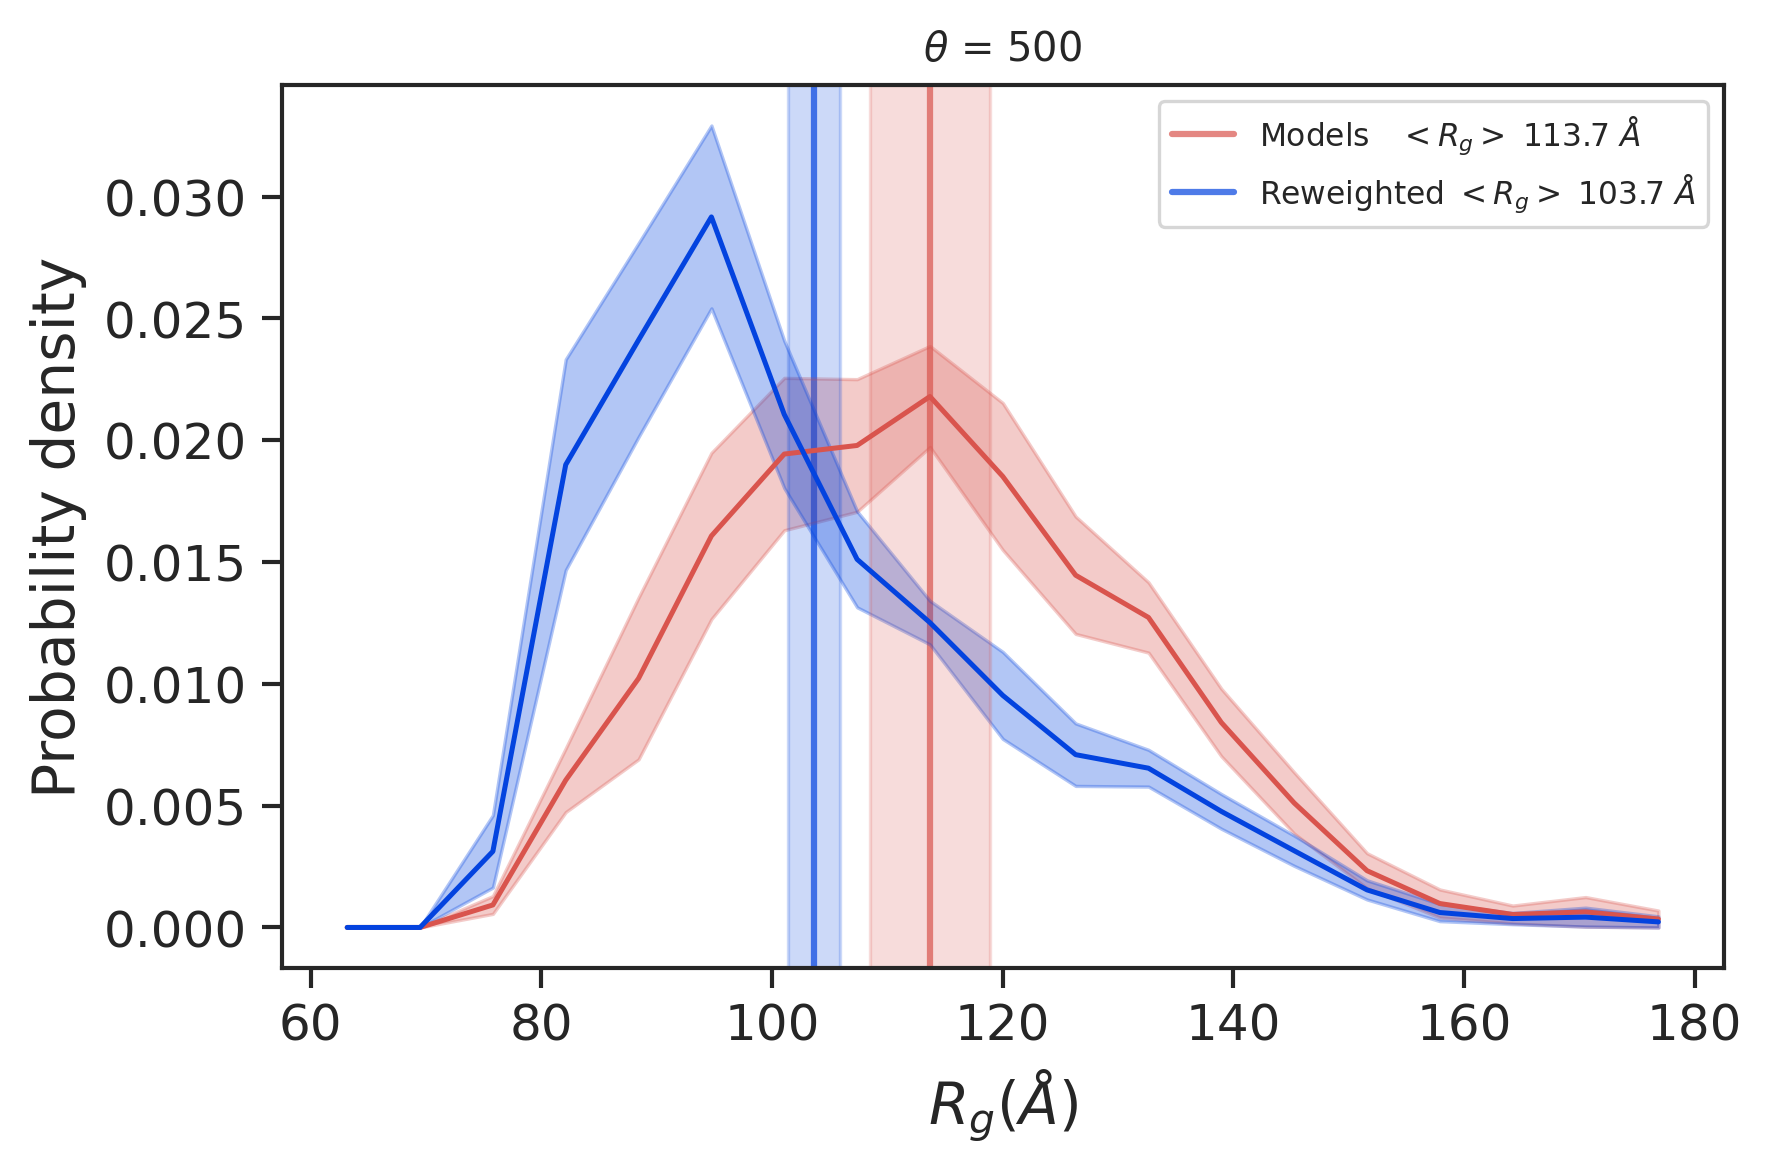

In [8]:
## PLOT Rg histograms ##
#data =Rg
data = np.loadtxt('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/GHR_SP_ECD_TMD_ICD_GFPpws10_Rg_05useq_comb.dat',usecols=0)


sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(60,180,20)
#bins = np.linspace(10,60,20)
#bins = np.linspace(20,120,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/example_eq5d5us_combX_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)

xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

#ax.axvspan(RgExp-0.09,29.0+0.09, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
#plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_g$ 29.0 $\AA$ $\pm$ 0.09' )
#plt.axvline(RhExp,ls='--',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_h$  21.5 $\AA$ $\pm$ 1.1' )
ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta)) 
#plt.ylim(-0.001,0.6)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
#plt.savefig('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/Rg_hist_theta500_eq0d5us_comb.pdf', format = 'pdf')
plt.show()

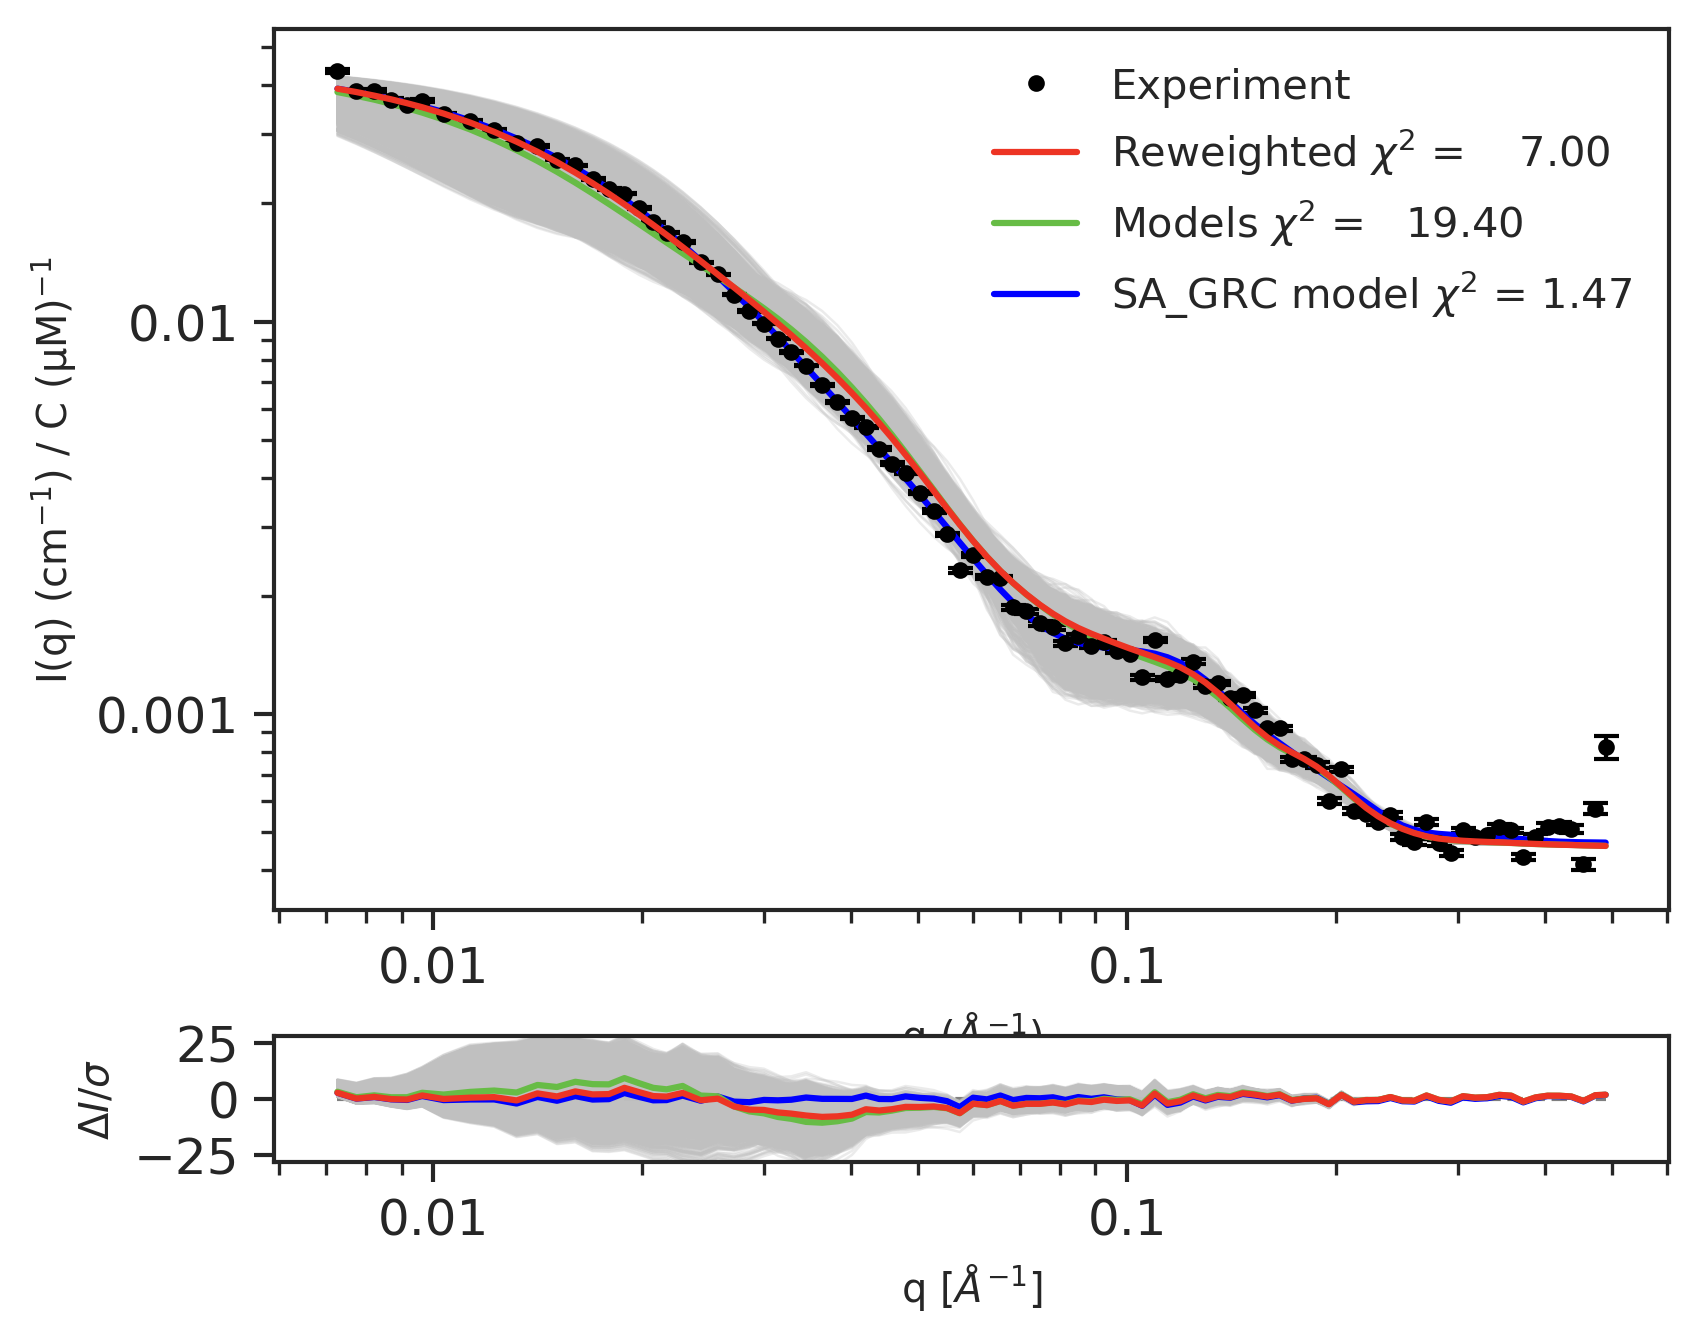

In [9]:
fits1=[]
dirs1 = sorted(glob.glob('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/Data_eq0d5_comb/**/fit1.dat', recursive=True))
#print(dirs1)
for num1, file in enumerate(dirs1):

    fits1.append(np.genfromtxt(file, skip_header=3))
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

sts = np.loadtxt("/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/example_eq1us_PR_4_.stats.dat");
sts2 = np.loadtxt("/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/Data_eq0d5_comb/GHR_NDSAXSbest.chi", skiprows = 11);

# SA_GRC model
sagrc = np.loadtxt("/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/Data_eq0d5_comb/fig6_fitAB_BestPar_wSP_AB_CVMPaf_310121_fit.dat", skiprows = 3)



fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = False, gridspec_kw = {"height_ratios" : [7,1], "hspace" : 0.25},figsize=(6, 5))

#Experimental
ax0.loglog( sts[:,0],sts[:,1]/0.275, 'o',alpha=1,label="Experiment", c='black',markersize = 3,zorder = 6)

#ax0.fill_between( sts[:,0], sts[:,1] - sts[:,2], 
#                 sts[:,1] + sts[:,2], color = c1, alpha = 0.4, linewidth = 0)

ax0.errorbar (sts[:,0],sts[:,1]/0.275,yerr=sts[:,2],alpha=1,capsize=3, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none',zorder = 4)


#Reweigthed
ax0.loglog( sts[:,0],sts[:,4]/0.275,label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c='#ED3424',linewidth = 1.5, zorder = 6)

#Models
ax0.loglog( sts[:,0],sts[:,3]/0.275,label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c='#67BC46', linewidth = 1.5, zorder = 5)

#SAGRC
ax0.loglog(sagrc[:,0],(sagrc[:,1]/0.275),c='blue', alpha=1, linewidth=1.5, zorder=4, label = 'SA_GRC model $\chi^2$ = 1.47')


#Fits
for num1, fit in enumerate(fits1):
    ax0.loglog(fit[:,0],(fit[:,1]/0.275),c='silver', alpha=0.3, linewidth=0.6)

from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax0.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax0.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

#ax0.set_yticks((1e-1,0))

ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)
ax0.set_xlabel( r'q ($\AA^{-1}$)' )
ax0.set_ylabel( r'I(q) (cm$^{-1}$) / C (µM)$^{-1}$')
ax0.legend( loc = 1, frameon = False, prop={'size': 10})
#residual plot

ax1.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1]/0.275 - sts[:,4]/0.275 ) / (sts[:,2]/0.275), '#ED3424', linewidth = 1.5, label = 'Reweighted', zorder = 6)
ax1.plot( sts[:,0], ( sts[:,1]/0.275 - sts[:,3]/0.275 ) / (sts[:,2]/0.275), c='#67BC46', linewidth = 1.5, label = 'Models', zorder = 5 )

ax1.plot(sagrc[:,0],((sts2[:,1]/0.275) - (sagrc[:,1]/0.275)) /(sts2[:,2]/0.275),c='blue', alpha=1, linewidth=1.5, zorder=4)



for num1, fit in enumerate(fits1):
       ax1.plot( fit[:,0], ((sts2[:,1]/0.275) - (fit[:,1]/0.275) ) / (sts2[:,2]/0.275), c='silver',alpha=0.3, linewidth=0.6 )


ax1.set_xscale('log')
ax1.set_ylim((-28,28))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

#ax1.legend(loc = 1, prop={'size': 14})
#ax0.set_ylabel
#ax0.legend()

#plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/SAXS_fit_Theta_500_Neff_eq0d5us_comb.pdf', format = 'pdf')
plt.show()

In [ ]:
~/remote-home/remote-home/# SA_GRC model
#sagrc = np.loadtxt("/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/Data_eq1us/SA_GRSPCM_AB2401120_fit.dat", skiprows = 3)
#sagrc = np.loadtxt("/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/Data_eq1us/SA_GRSPCM_AB0901220_fit.dat", skiprows = 3)

#ax2.loglog(sagrc[:,0],(sagrc[:,1]/0.275),c='blue', alpha=1, linewidth=2, zorder=2, label = 'SA_GRC model $\chi^2$ = 1.66')

#ax3.plot(sagrc[:,0],((sts2[:,1]/0.275) - (sagrc[:,1]/0.275)) /(sts2[:,2]/0.275),c='blue', alpha=1, linewidth=2, zorder=2)



## New plots Fig 5 -- Rgs with BME-rew

#### AA comformations taken from the combined trj w/o the first 0.5 µs oe each simt

Rg_all mean ± std = 113.6479399869793 ± 18.27117577406266
Rg_all_W mean ± std = 103.64416747200995 ± 18.959855388807977
Rg_ecd mean ± std = 27.430044749194508 ± 2.313165418522563
Rg_ecd_W mean ± std = 27.58895645673448 ± 2.320102422298191
Rg_icd mean ± std = 64.50756119379277 ± 11.996796683768222
Rg_icd_W mean ± std = 59.60537665038547 ± 11.682497519200515
Rg_icdgfp mean ± std = 66.68779173030764 ± 13.475777394118518
Rg_icdgfp_W mean ± std = 61.60413920992527 ± 13.112243326397124


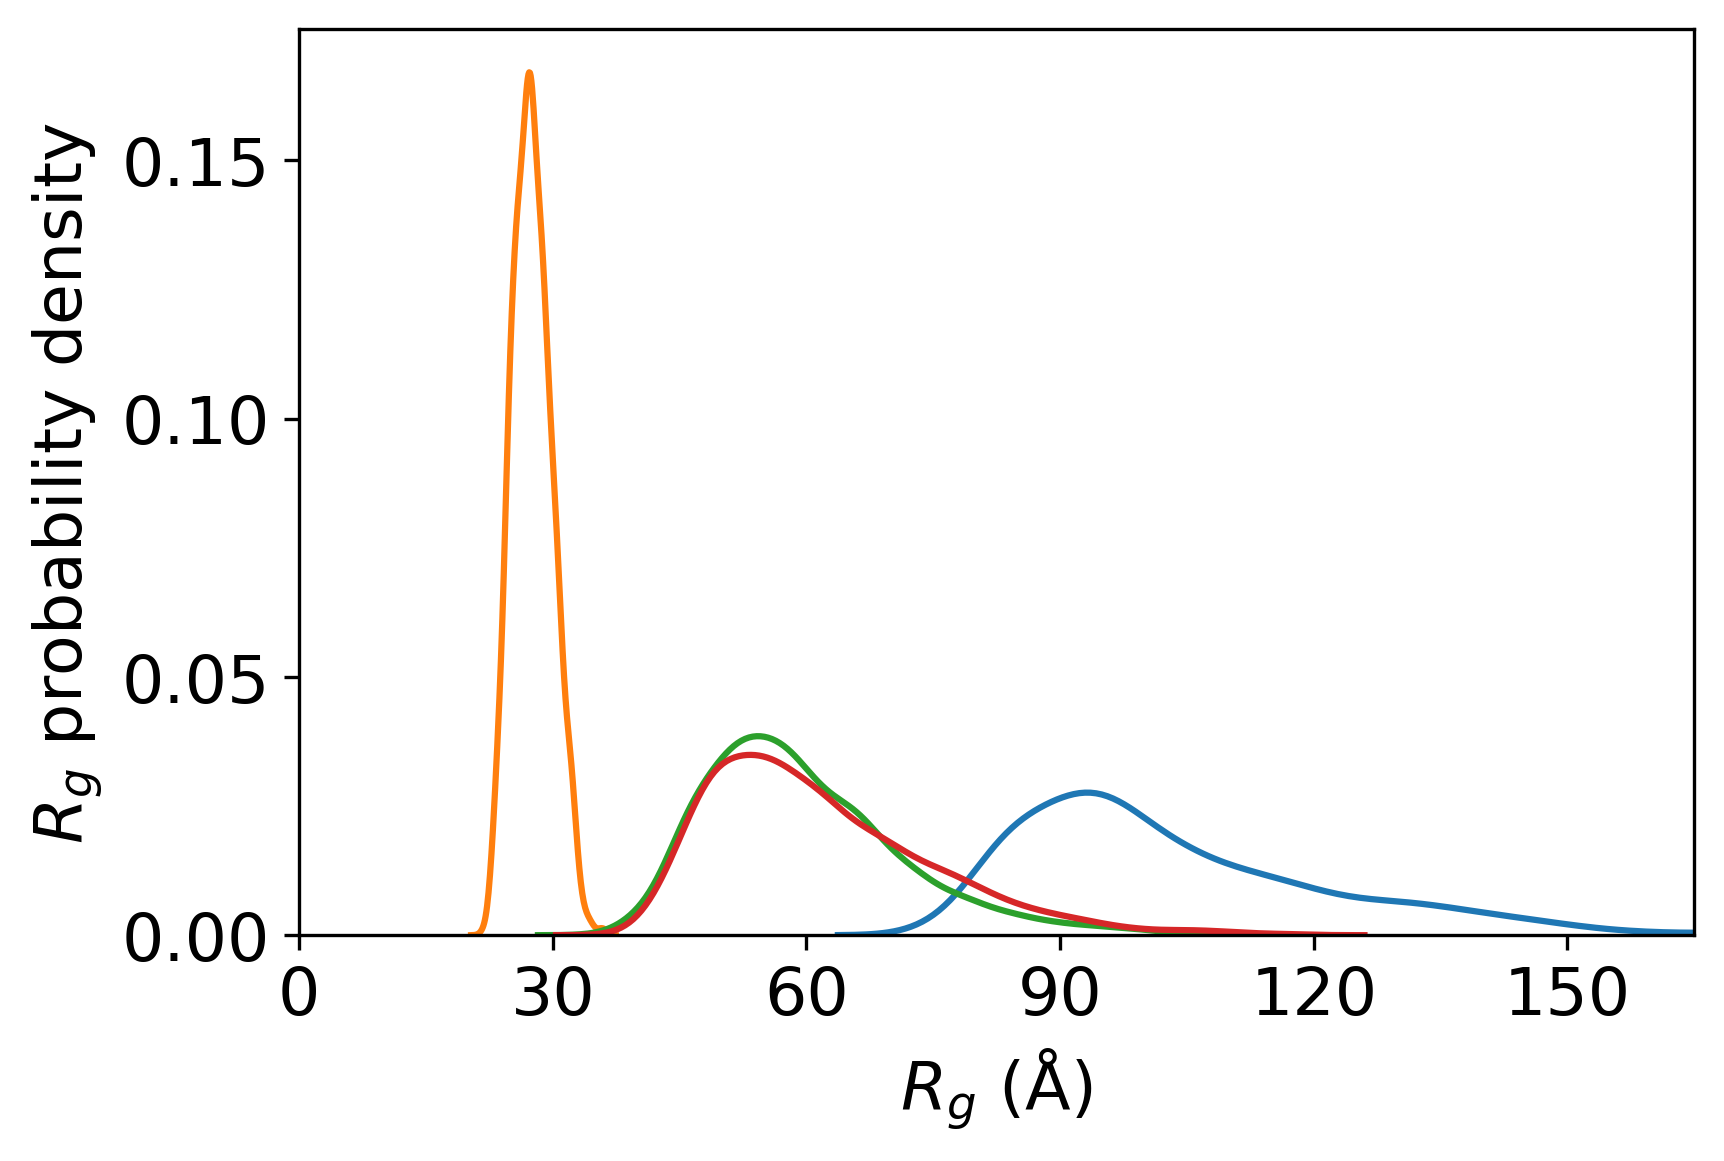

In [43]:

plt.figure( figsize = (6,4))
file_Rg ='/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/GHR_SP_ECD_TMD_ICD_GFPpws10_Rg_05useq_comb.dat'

weights = np.loadtxt('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/example_eq5d5us_combX_0_weights.dat', usecols=1)

Rg_0d5c = np.genfromtxt(file_Rg)

#plt.subplot(111)
#w1 = 9.1
#w2 = 1
#w3 = 7.1
#w4 = 8
#n1 = math.ceil((159 - 68)/w)
#n2 = math.ceil((31 - 21)/w)
#n3 = math.ceil((107 - 36)/w)
#n4 = math.ceil((115 - 35)/w)

Rg_all = (Rg_0d5c[:,0])
Rg_ecd = (Rg_0d5c[:,1])
Rg_icd = (Rg_0d5c[:,2])
Rg_icdgfp = (Rg_0d5c[:,3])

Rg_allW = ((Rg_0d5c[:,0]*weights)*6004)

Rg_ecdW = ((Rg_0d5c[:,1]*weights)*6004)
Rg_icdW = ((Rg_0d5c[:,2]*weights)*6004)
Rg_icdgfpW = ((Rg_0d5c[:,3]*weights)*6004)

Rg_all_mean=np.mean(Rg_all)
#Rg_all_meanw=np.sum(Rg_all*weights)
Rg_all_meanw=np.average(Rg_all, weights=weights)

Rg_all_std=np.std(Rg_all)
Rg_all_stdw=np.sqrt(np.cov(Rg_all, aweights=weights))

Rg_ecd_mean=np.mean(Rg_ecd)
Rg_ecd_meanw=np.average(Rg_ecd,weights=weights)

Rg_ecd_std=np.std(Rg_ecd)
Rg_ecd_stdw=np.sqrt(np.cov(Rg_ecd, aweights=weights))

Rg_icd_mean=np.mean(Rg_icd)
Rg_icd_meanw=np.average(Rg_icd,weights=weights)

Rg_icd_std=np.std(Rg_icd)
Rg_icd_stdw=np.sqrt(np.cov(Rg_icd, aweights=weights))

Rg_icdgfp_mean=np.mean(Rg_icdgfp)
Rg_icdgfp_meanw=np.average(Rg_icdgfp,weights=weights)

Rg_icdgfp_std=np.std(Rg_icdgfp)
Rg_icdgfp_stdw=np.sqrt(np.cov(Rg_icdgfp, aweights=weights))

print ('Rg_all mean ± std =', Rg_all_mean, '±',Rg_all_std)
print ('Rg_all_W mean ± std =', Rg_all_meanw, '±',Rg_all_stdw)

print ('Rg_ecd mean ± std =', Rg_ecd_mean, '±',Rg_ecd_std)
print ('Rg_ecd_W mean ± std =', Rg_ecd_meanw, '±',Rg_ecd_stdw)

print ('Rg_icd mean ± std =', Rg_icd_mean, '±',Rg_icd_std)
print ('Rg_icd_W mean ± std =', Rg_icd_meanw, '±',Rg_icd_stdw)

print ('Rg_icdgfp mean ± std =', Rg_icdgfp_mean, '±',Rg_icdgfp_std)
print ('Rg_icdgfp_W mean ± std =', Rg_icdgfp_meanw, '±',Rg_icdgfp_stdw)

#sns.distplot(Rg_l20[:,1], hist = True, kde = False, kde_kws = {'linewidth': 3}, color='black')
#sns.distplot(Rg_l20[:,2], hist = True, kde = False, kde_kws = {'linewidth': 3}, color='red')
#sns.distplot(Rg_l20[:,3], hist = True, kde = False, kde_kws = {'linewidth': 3}, color='green')
#sns.distplot(Rg_l20[:,4], hist = True, kde = False, kde_kws = {'linewidth': 3}, color='blue')
#plt.hist(Rg_l20[:,1],bins=18, density = False, range=[68,159])
#plt.hist(Rg_l20[:,2],bins=5, density = False, range=[21,31])
#plt.hist(Rg_l20[:,3],bins=14, density = False, range=[36,107])
#plt.hist(Rg_l20[:,4],bins='auto', density = True, range=[35,115])

#plt.hist(Rg_all,bins=32, density = False, range=[20,180])
#plt.hist(Rg_ecd,bins=64, density = False, range=[20,180])
#plt.hist(Rg_icd,bins=32, density = False, range=[20,180])
#plt.hist(Rg_icdgfp,bins=32, density = False, range=[20,180])


#plt.hist(Rg_all,bins=32, density = True,   range=[20,180])

#plt.hist(Rg_ecd,bins=32, density = True,   range=[20,180])
#plt.hist(Rg_icd,bins=32, density = True,   range=[20,180])
#plt.hist(Rg_icdgfp,bins=32, density = True,range=[20,180])

plt.subplot(111)
#sns.kdeplot(Rg_all) 
sns.kdeplot(Rg_all, weights=weights) 
#sns.kdeplot(Rg_ecd)
sns.kdeplot(Rg_ecd,  weights=weights  )
#sns.kdeplot(Rg_icd) 
sns.kdeplot(Rg_icd,  weights=weights  ) 
#sns.kdeplot(Rg_icdgfp,) 
sns.kdeplot(Rg_icdgfp, weights=weights) 


#plt.ticklabel_format (useOffset=True)
locs, labels = yticks() 
yticks(np.arange(0, 0.2, step=0.05))
xticks(np.arange(0, 180, step=30))
plt.xlabel('$R_g$ (Å)')
plt.ylabel('$R_g$ probability density')
plt.xlim([0, 200])
plt.xlim([0, 165])
plt.savefig('/home/raul/remote-home/remote-home/MD-sims/SPTMRs/GHR/CG/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/productiveMD/results/RG_rew_plot_050221.pdf',dpi=300, format = 'pdf')
plt.show()
#plt.tight_layout() 

103.19919471907956 6.203181349806912


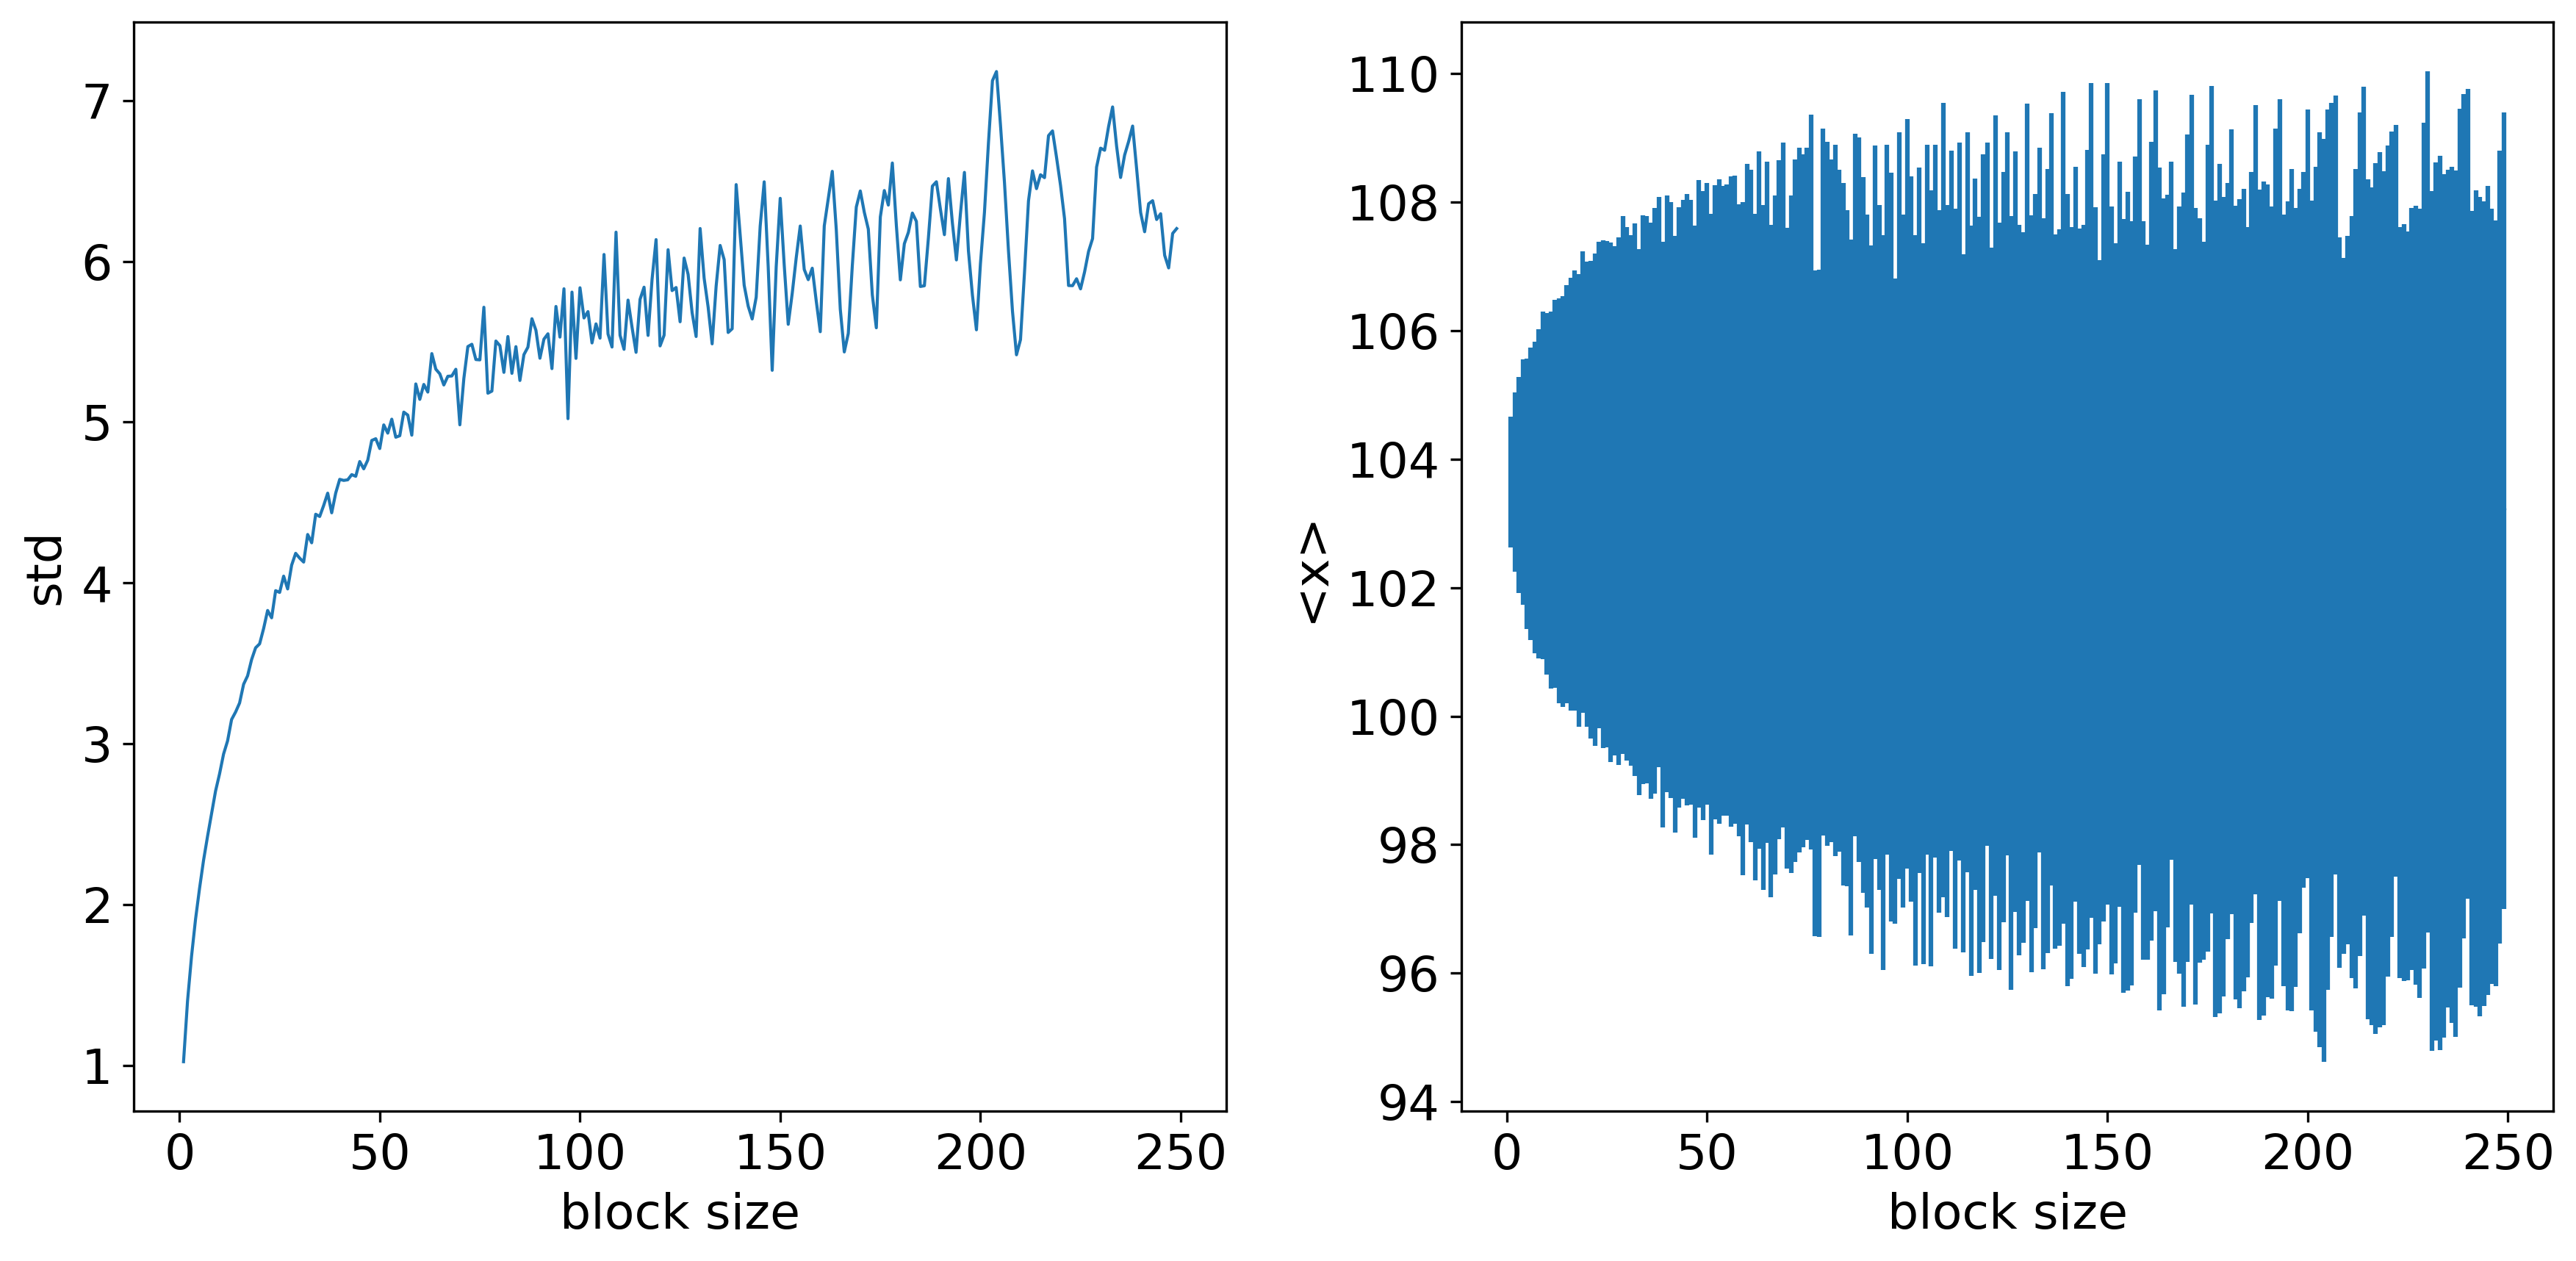

27.460214564705158 2.0753317278558323


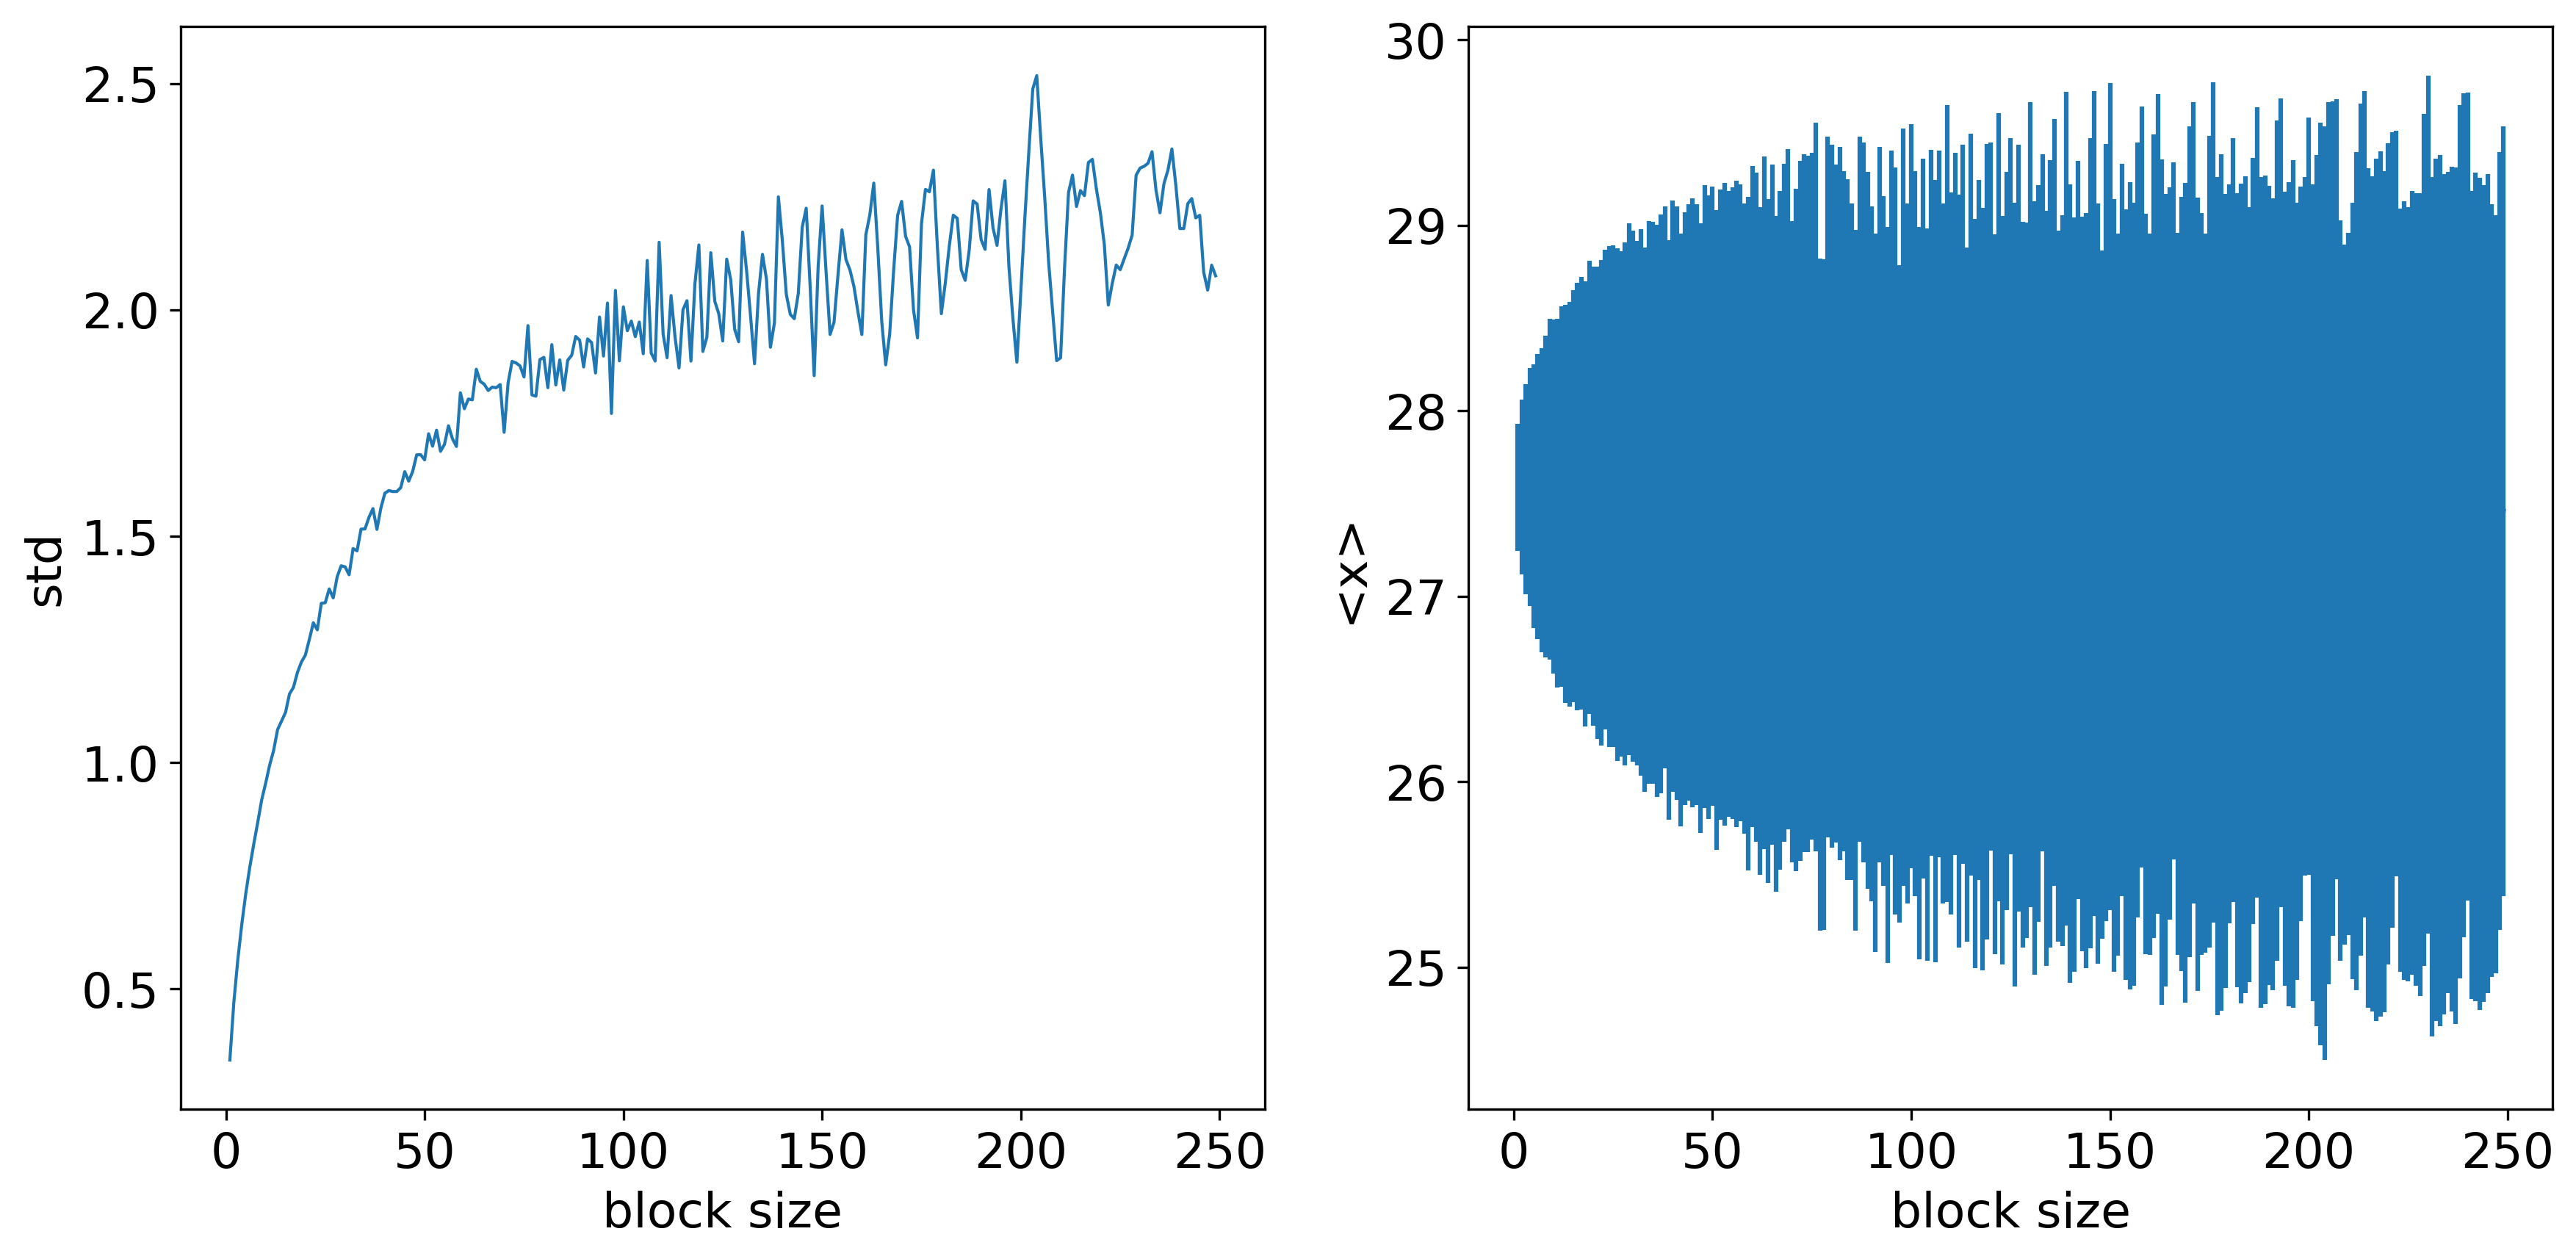

59.26469399111969 3.6184390156492365


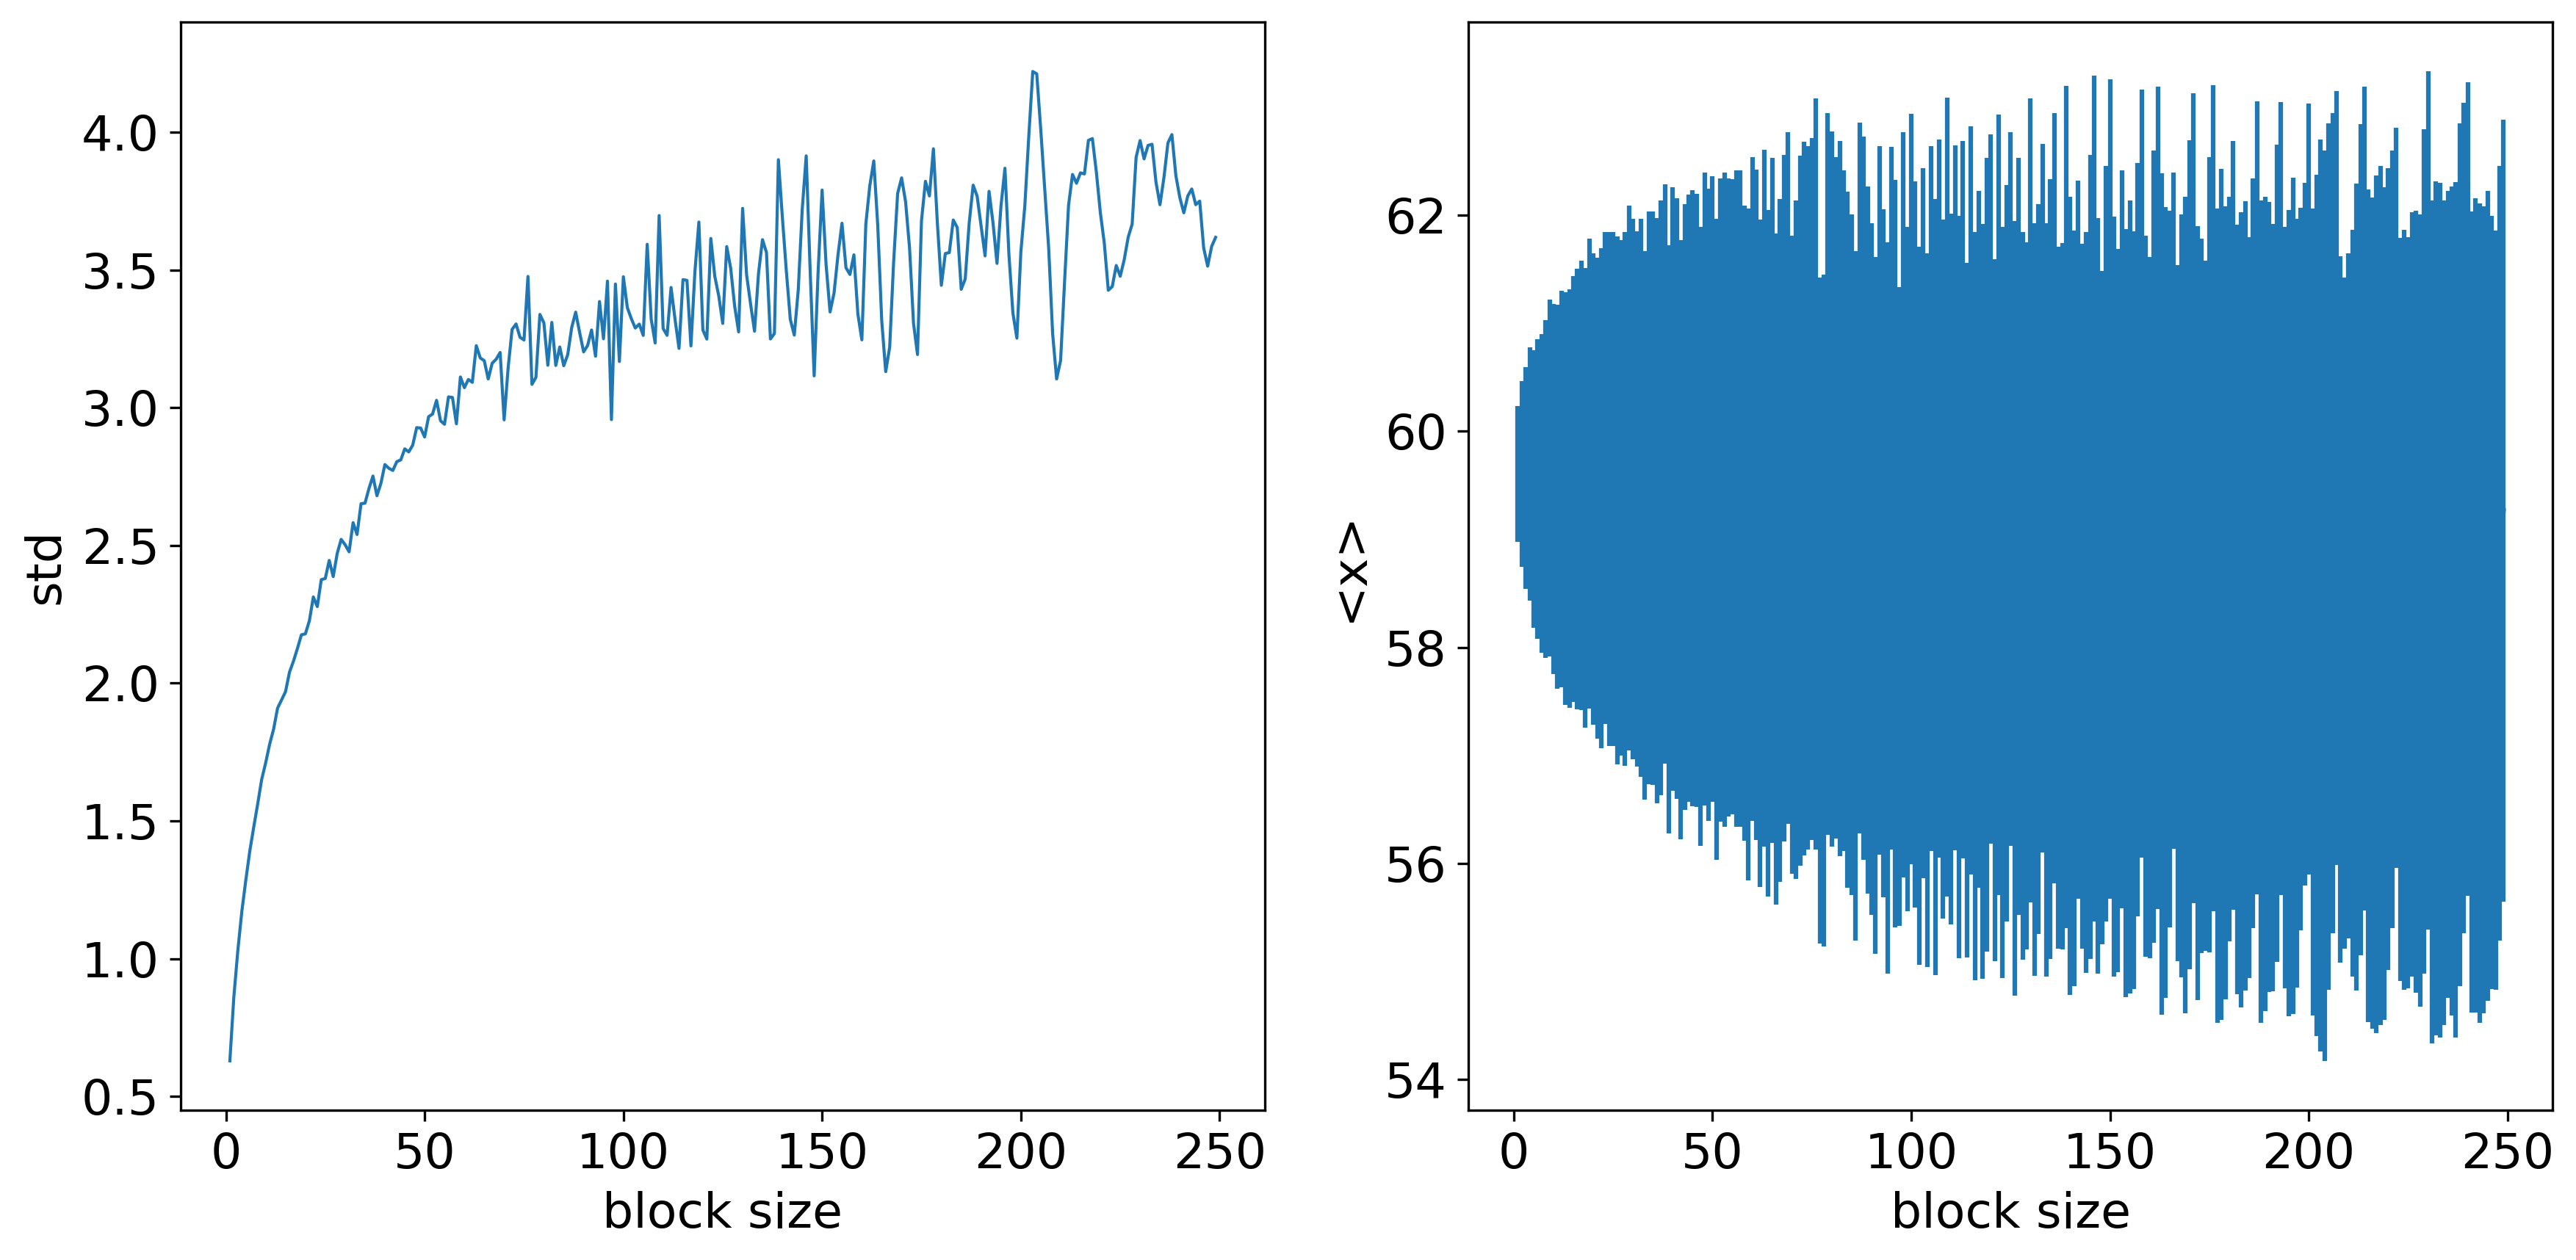

61.3076284276309 3.7680237320024674


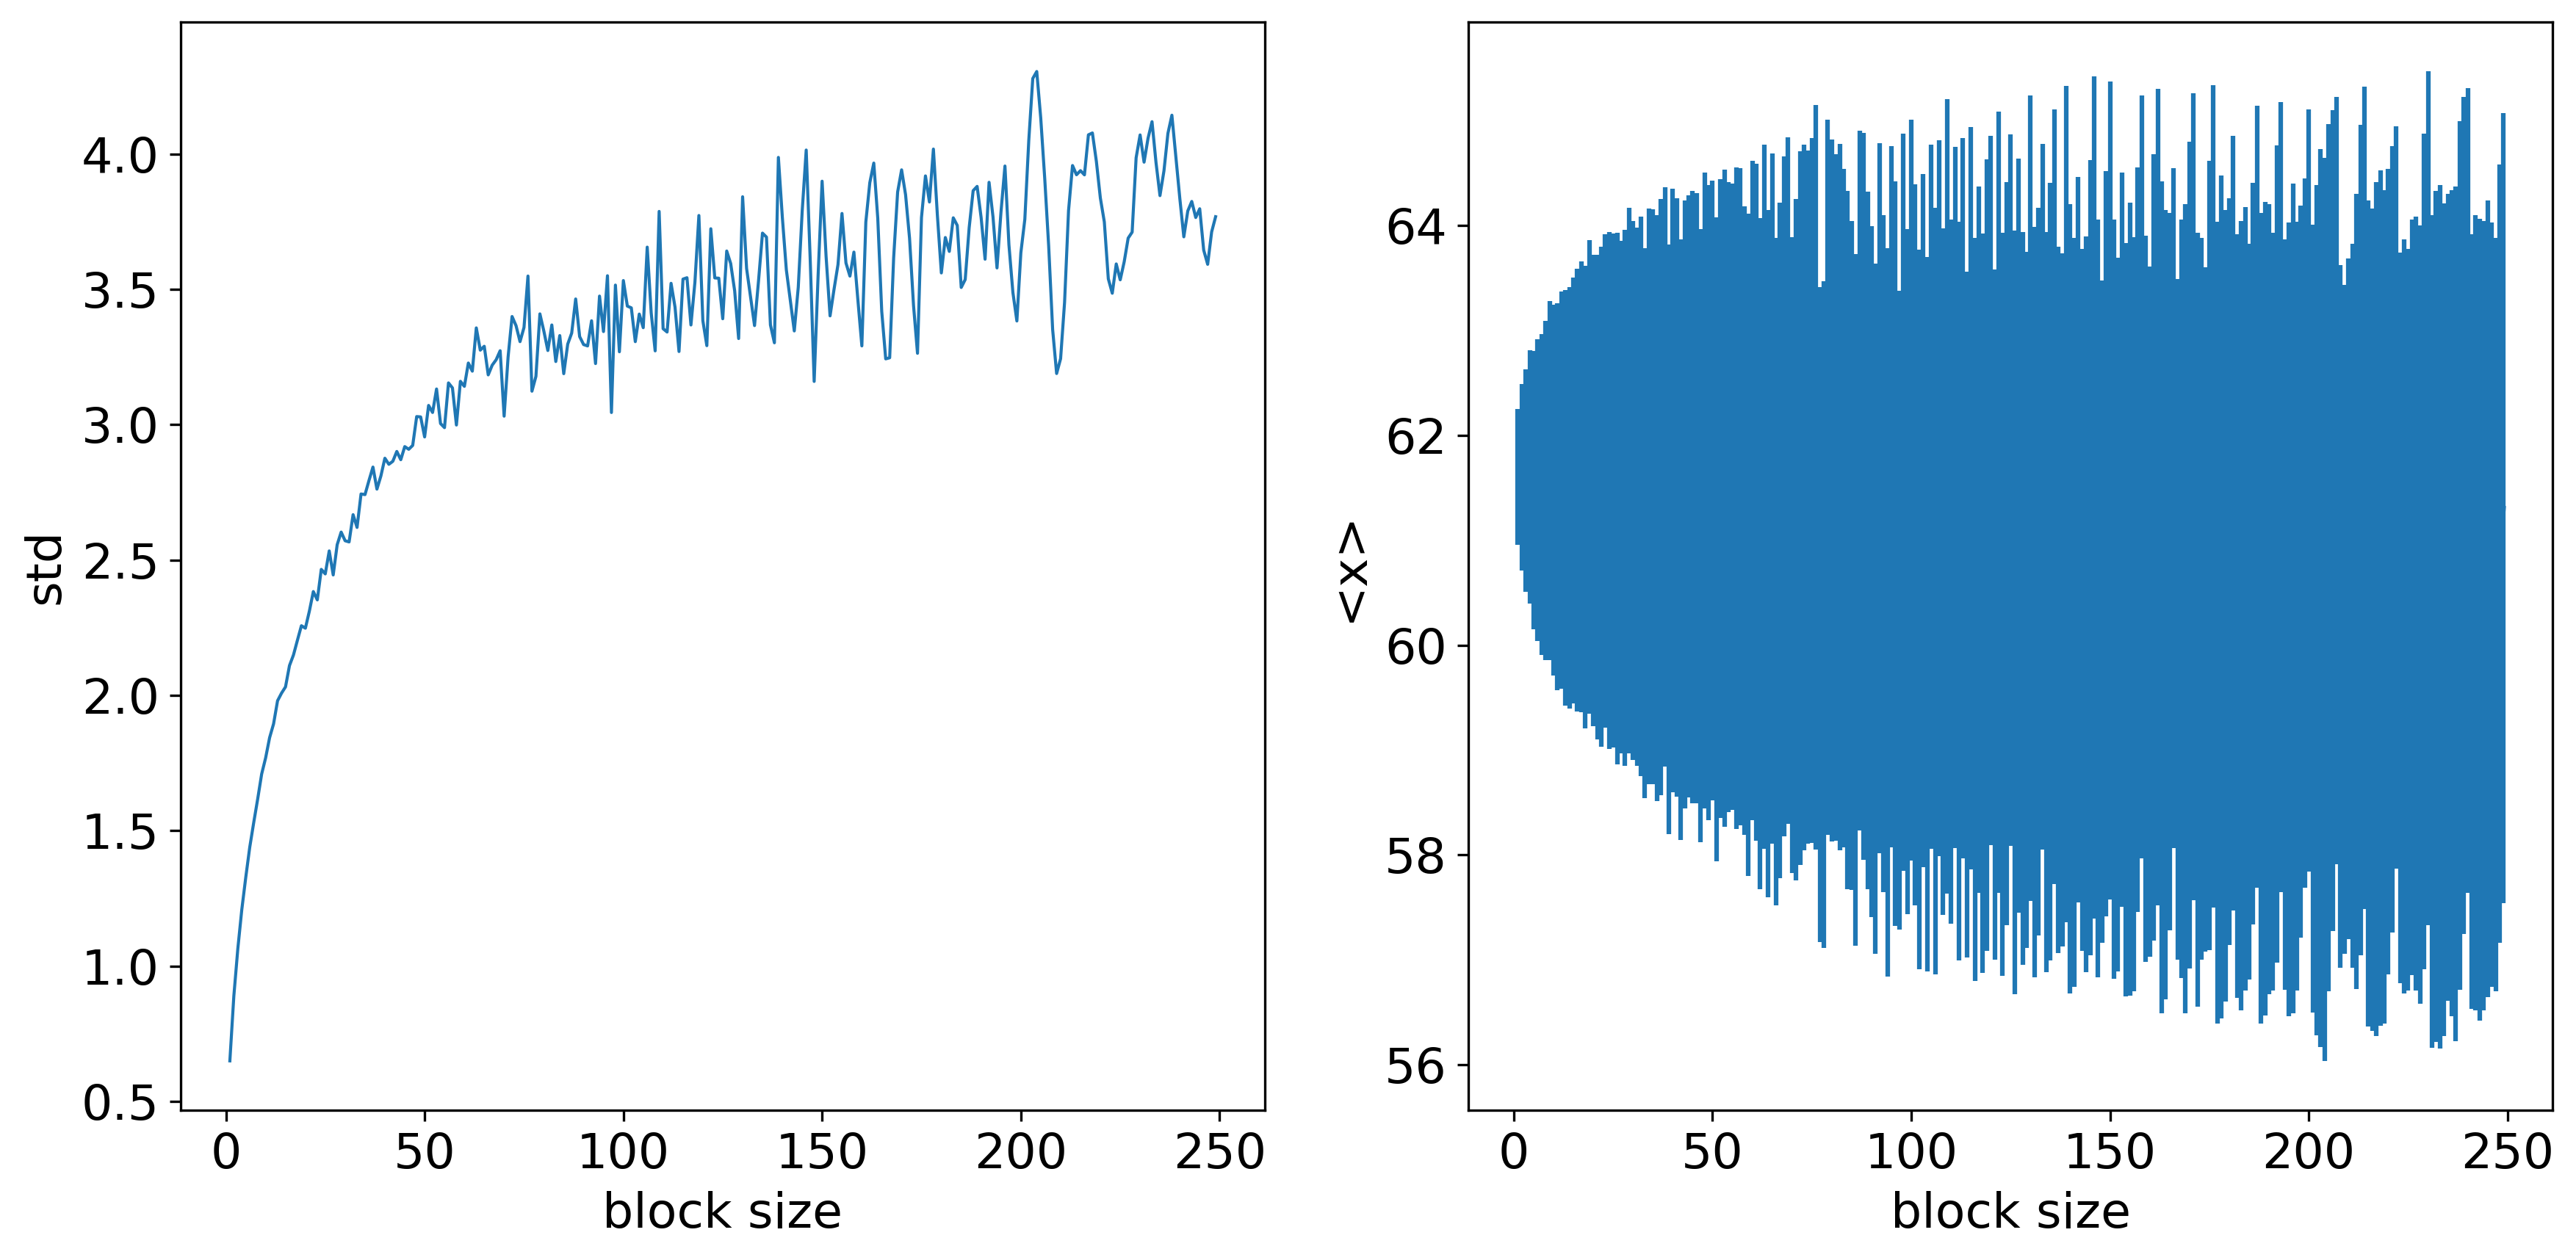

In [36]:
blockAverage(Rg_allW,maxBlockSize= 250)
#blockAverage(Rg_all,maxBlockSize= 250)
blockAverage(Rg_ecdW ,maxBlockSize= 250)
blockAverage(Rg_icdW,maxBlockSize= 250)
blockAverage(Rg_icdgfpW,maxBlockSize= 250)

## Helix tilt and ECD angle --- rew

TMDz_ang mean ± std = 16.11860926105771 ± 7.808176808189792
TMDz_ang rew-mean ± std = 15.838328376563032 ± 7.570779647018736
D2z_ang mean ± std = 42.19257360353999 ± 15.240176933735608
D2z_ang rew-mean ± std = 39.86243778580896 ± 15.253090607442495


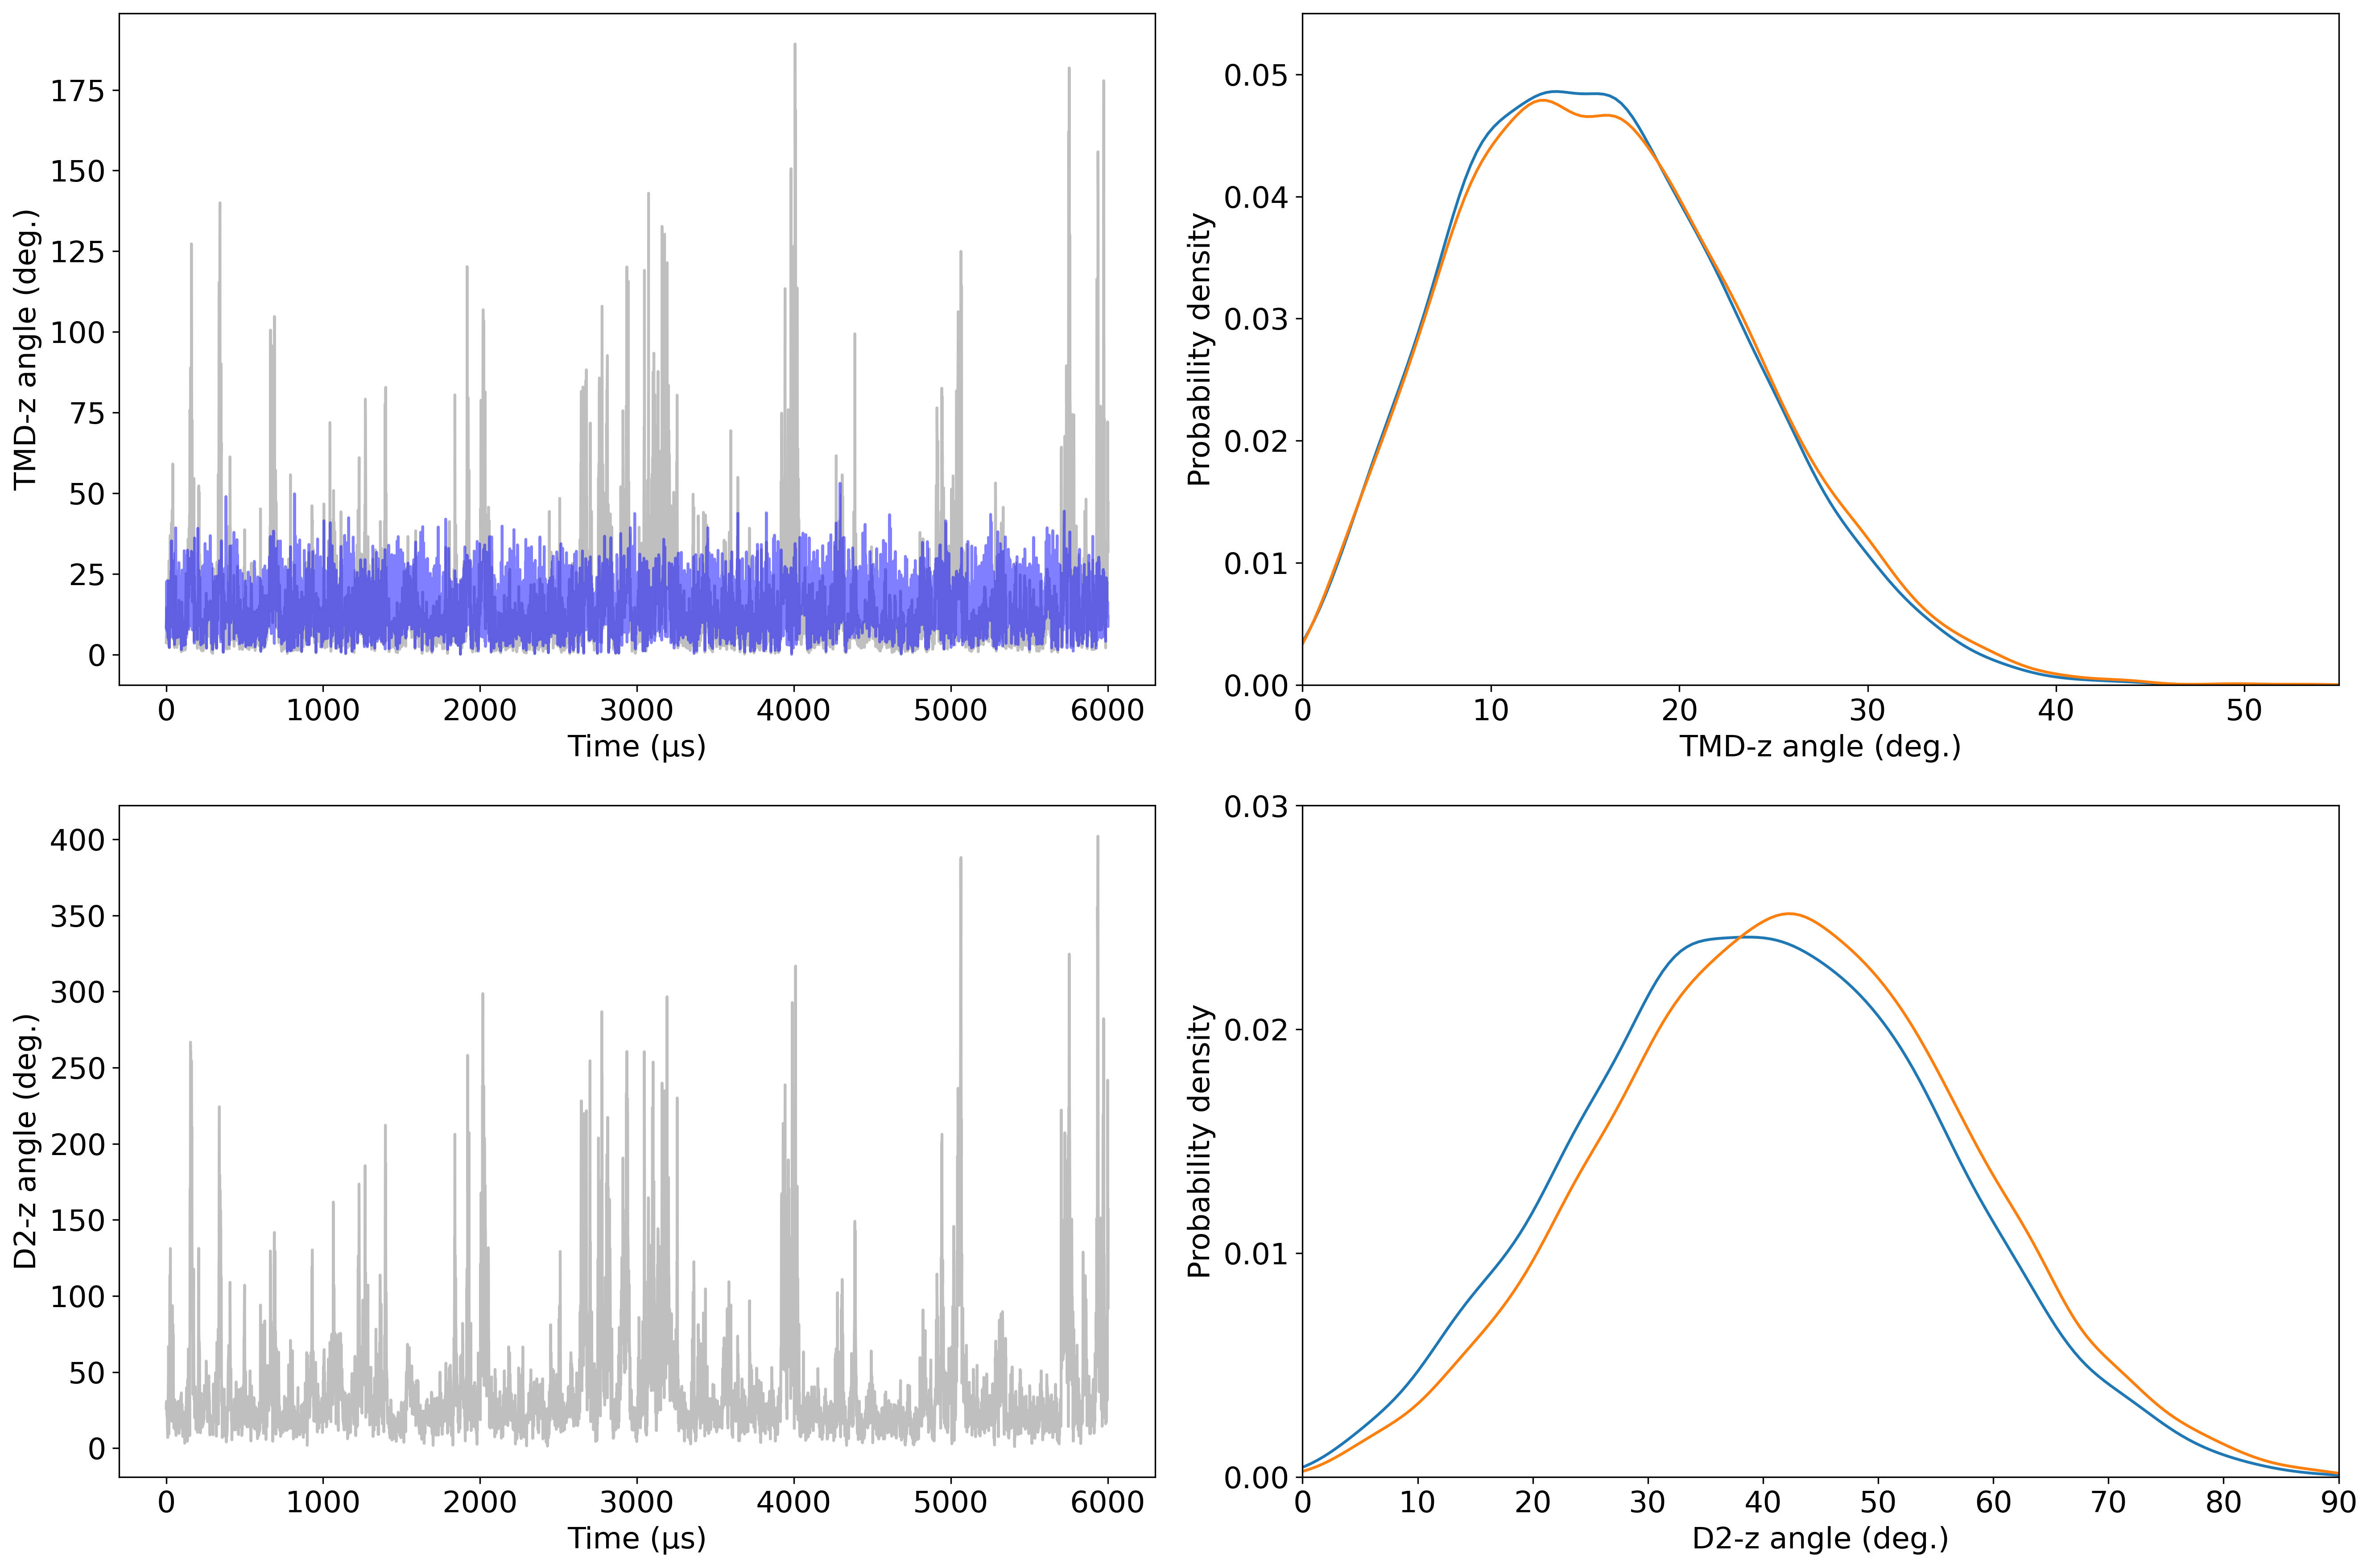

In [23]:
import sys 
import os 
import glob
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import scipy
import scipy.stats
import matplotlib.ticker as ticker
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter, FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from gridData import Grid 
from io import StringIO
from collections import Counter
from scipy import stats
from scipy.stats import norm
from  scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from pylab import *
from matplotlib.ticker import NullFormatter
from matplotlib import font_manager
font_manager.findfont('Helvetica')

##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['pdf.fonttype'] = 42 
#plt.rc('font', family='Helvetica')
##

### Panel A  -- TMD z-angle  ###

plt.figure( figsize = (18,12))

file1 ='/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/GHR_SP_ECD_TMD_ICD_GFPpws10_TMDtilt_05useq_comb.dat'
file2 ='/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/GHR_SP_ECD_TMD_ICD_GFPpws10_D2anglez_05useq_comb.dat'

weights = np.loadtxt('/home/raul/projects/GHR_FL/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/ensemble_fit_copy/r4fit/BME/example_eq5d5us_combX_0_weights.dat', usecols=1)


TMDz= np.genfromtxt(file1)
D2z= np.genfromtxt(file2)

#original 
TMDz_ang= (TMDz[:,2])
D2z_ang= (D2z[:,3])

#rew
TMDz_angW= ((TMDz[:,2]*weights)*6004)
D2z_angW= ((D2z[:,3]*weights)*6004)

#mean and SD
TMDz_ang_mean=np.mean(TMDz_ang)
TMDz_ang_std=np.std(TMDz_ang)
D2z_ang_mean=np.mean(D2z_ang)
D2z_ang_std=np.std(D2z_ang)

#rew mean and SD

TMDz_ang_meanW=np.average(TMDz_ang, weights=weights)
TMDz_ang_stdW=np.sqrt(np.cov(TMDz_ang, aweights=weights))

D2z_ang_meanW=np.average(D2z_ang, weights=weights)
D2z_ang_stdW=np.sqrt(np.cov(D2z_ang, aweights=weights))

print ('TMDz_ang mean ± std =', TMDz_ang_mean, '±',TMDz_ang_std)
print ('TMDz_ang rew-mean ± std =', TMDz_ang_meanW, '±',TMDz_ang_stdW)

print ('D2z_ang mean ± std =', D2z_ang_mean, '±',D2z_ang_std)
print ('D2z_ang rew-mean ± std =', D2z_ang_meanW, '±',D2z_ang_stdW)



def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


#num_curves = len(fits1)             
#print(num_curves)


ma=np.mean(rolling_window(TMDz_angW, 100), 1)
plt.subplot(221)
plt.plot(TMDz_angW, color='gray', alpha=0.5)
plt.plot(TMDz_ang, color='blue', alpha=0.5)
#plt.plot((ma[:,0]*0.002),ma[:,2], color='red')
plt.xlabel('Time (µs)')
plt.ylabel('TMD-z angle (deg.)')
#plt.title(str(fname))
#plt.ylim([0, 55])
#plt.xlim([0, 30])


plt.subplot(222)

sns.kdeplot(TMDz_ang, weights=weights)
sns.kdeplot(TMDz_ang) 
locs, labels = yticks() 
yticks(np.arange(0, 0.125, step=0.01))
#plt.ticklabel_format (useOffset=True)

#yticks(np.arange(0, 0.125, step=0.05))
plt.xlabel('TMD-z angle (deg.)')
plt.ylabel('Probability density')
plt.xlim([0, 55])
plt.ylim([0, 0.055])

# D2-z angle

ma=np.mean(rolling_window(D2z_angW, 100), 1)
plt.subplot(223)
plt.plot(D2z_angW, color='gray', alpha=0.5)
#plt.plot((ma[:,0]*0.002),ma[:,6], color='red')
plt.xlabel('Time (µs)')
plt.ylabel('D2-z angle (deg.)')
#plt.title(str(fname))
#plt.ylim([0, 90])
#plt.xlim([0, 30])


plt.subplot(224)
sns.kdeplot(D2z_ang, weights=weights) 
sns.kdeplot(D2z_ang) 
locs, labels = yticks() 
yticks(np.arange(0, 0.125, step=0.01))

#plt.ticklabel_format (useOffset=True)
locs, labels = yticks() 
#yticks(np.arange(0, 0.125, step=0.05))
plt.xlabel('D2-z angle (deg.)')
plt.ylabel('Probability density')
plt.xlim([0, 90])
plt.ylim([0, 0.03])


plt.savefig('/home/raul/remote-home/remote-home/MD-sims/SPTMRs/GHR/CG/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/productiveMD/results/TMD_D2_angle_rew_plot_050221.pdf',dpi=300, format = 'pdf')
plt.tight_layout() 
plt.show()



## Protein density 

In [81]:
## Protein Density 

# load Dx file

pdens = Grid('/home/raul/remote-home/remote-home/MD-sims/SPTMRs/GHR/CG/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/productiveMD/results/GHRfl_SP_GFPmon_BB_dens_30us1ns.dx')






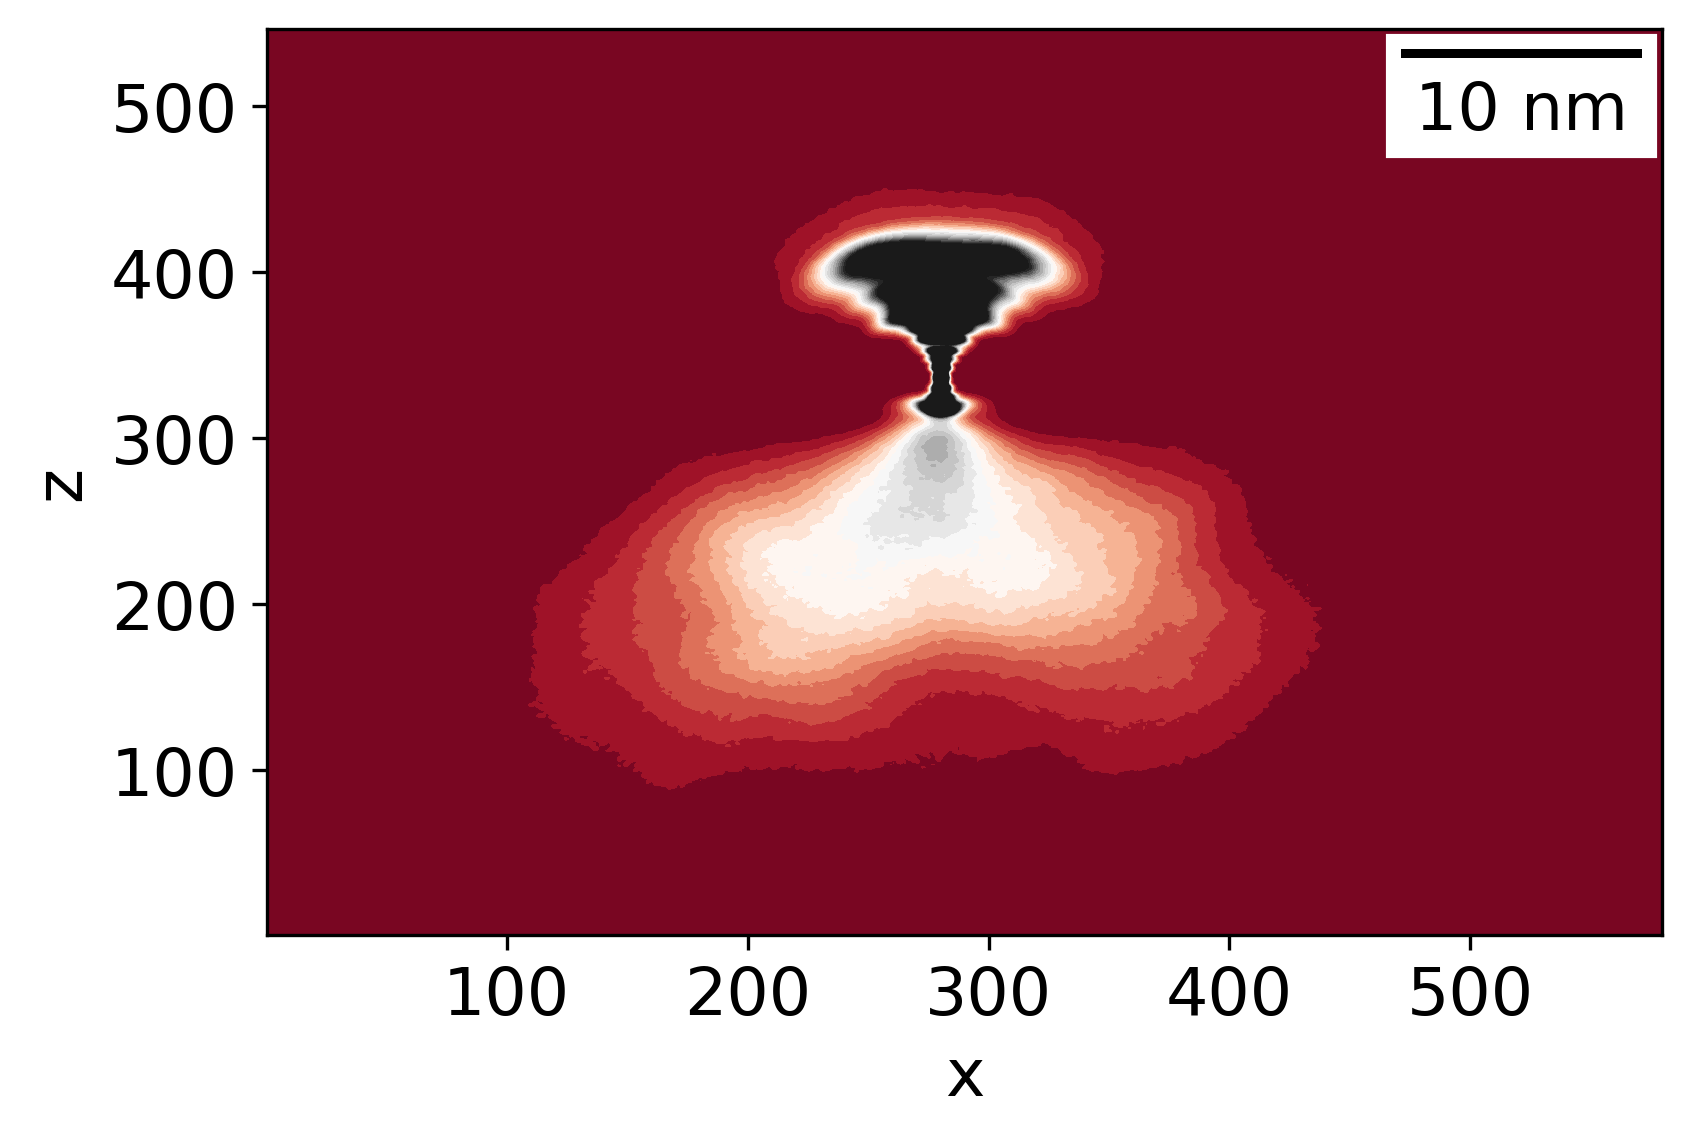

In [84]:
from matplotlib_scalebar.scalebar import ScaleBar
plt.figure( figsize = (6,4))
#from matplotlib.colors import LogNorm
#delta = 0.001
norm = cm.colors.Normalize(vmax=0.04)
plt.subplot(111)
locs, labels = xticks() 
xticks(np.arange(0, 600, step=100))
grid = pdens.grid
sum_vec = np.sum(grid, axis=0)
rot = np.rot90(sum_vec) 
#cf2 = plt.contour(rot, levels = 60, origin='upper', cmap='RdGy')
cf = plt.contourf(rot, levels = 100, origin='upper', cmap = 'RdGy', norm=norm,vmax= 0.04)
scalebar = ScaleBar(0.1, 'nm') # 1 pixel = 0.2 meter
plt.ylabel('z')
plt.xlabel('x')
plt.gca().add_artist(scalebar)
#plt.colorbar(cf)



#plt.subplot(122)
#grid = pdens.grid
#sum_vecy = np.sum(grid, axis=1)
#roty = np.rot90(sum_vecy) 
##cf2 = plt.contour(rot, levels = 50, origin='upper', cmap='RdGy')
#cf = plt.contourf(roty, levels = 100, origin='upper', cmap = 'RdGy', norm=norm,vmax= 0.06)
#plt.colorbar(cf)
#plt.subplot(133)
#grid = pdens.grid
#sum_avgxy = np.average(np.array ([sum_vec,sum_vecy]), axis=0)
#rotxyavg = np.rot90(sum_avgxy) 
##cf2 = plt.contour(rot, levels = 50, origin='upper', cmap='RdGy')
#cf = plt.contourf(rotxyavg , levels = 100, origin='upper', cmap = 'RdGy', norm=norm,vmax= 0.06)
#
#plt.colorbar(cf)
#plt.title(str(fname))      

#plt.tight_layout()    
#plt.savefig('/home/raul/remote-home/remote-home/MD-sims/SPTMRs/GHR/CG/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/productiveMD/results/GHR_SP_ECD_ICD_GFP_prot_dens_30us_1ns_231120.pdf',dpi=300, format = 'pdf')
#plt.colorbar(cf)
plt.show()

## Protein - lipid contacts

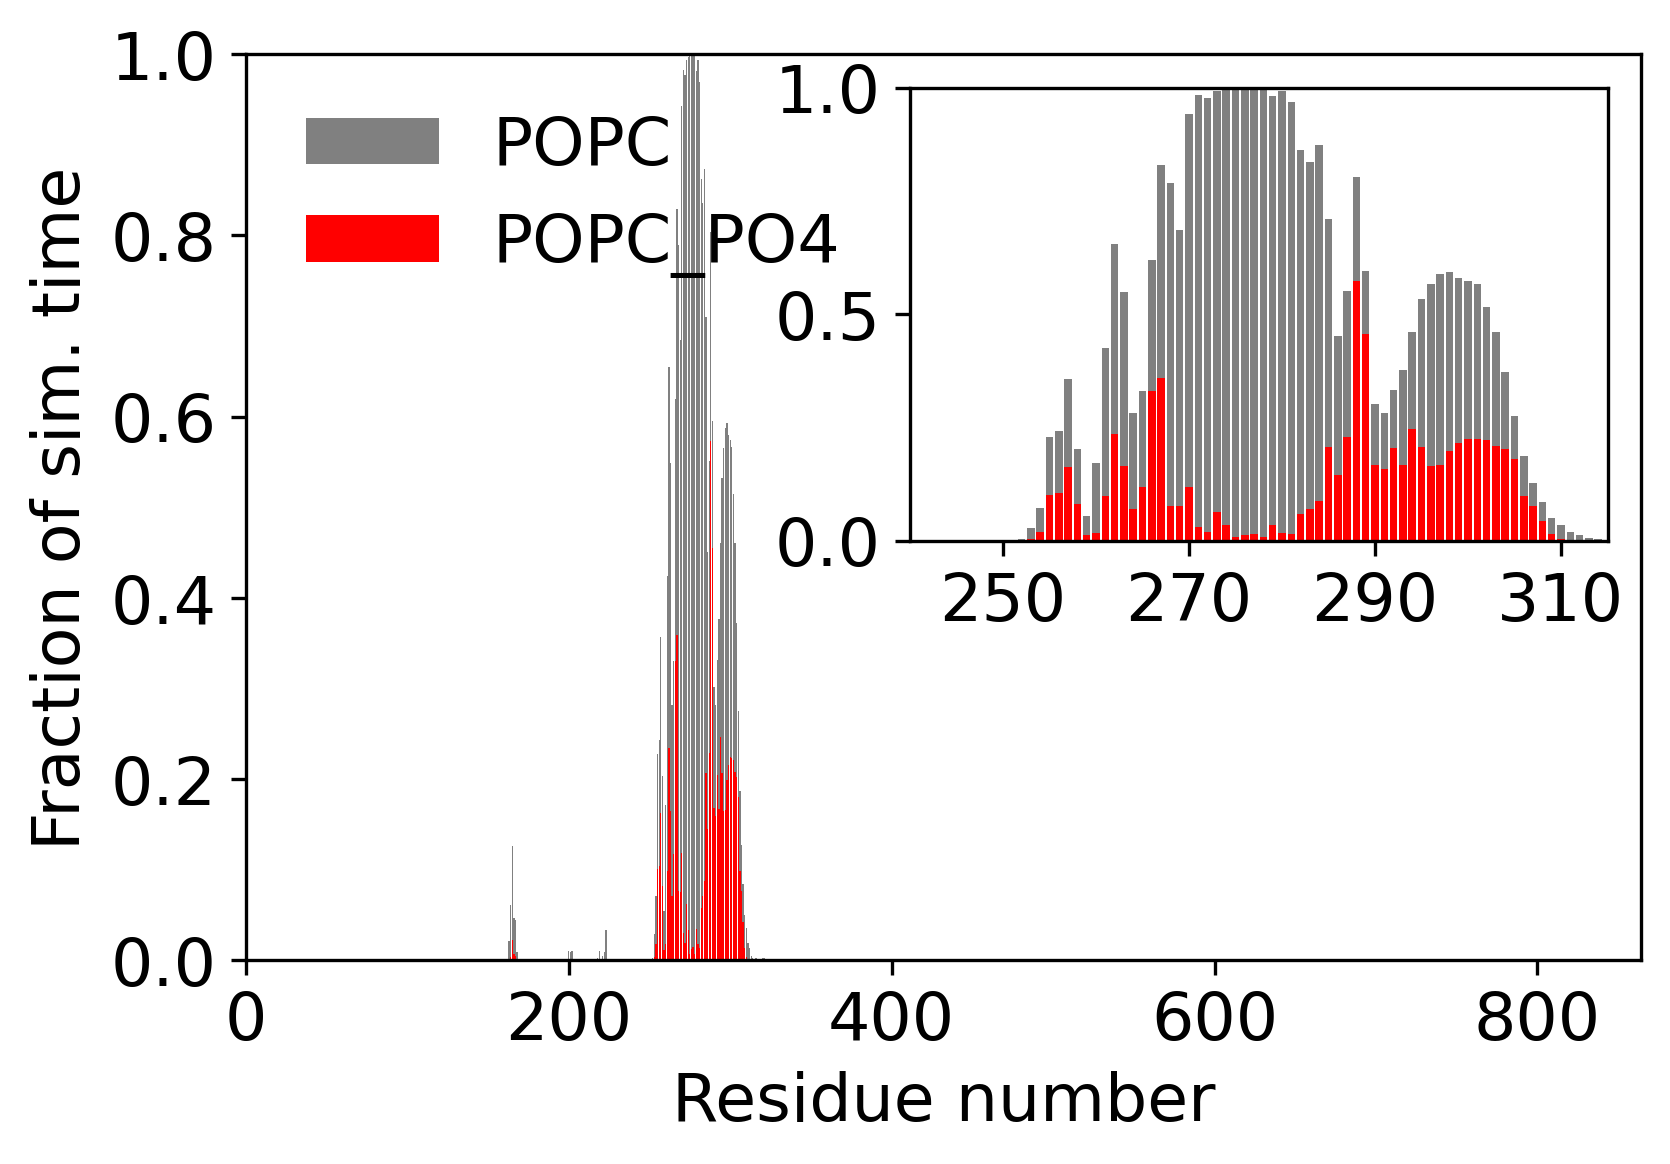

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
### Panel E ###
plt.figure( figsize = (6,4))
file1='/home/raul/remote-home/remote-home/MD-sims/SPTMRs/GHR/CG/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/productiveMD/results/PLcontact_PC_GHRfl_SP_GFP_30us.dat_hist.dat'
file2='/home/raul/remote-home/remote-home/MD-sims/SPTMRs/GHR/CG/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/productiveMD/results/PLcontact_PC_po4_GHRfl_SP_GFP_30us.dat_hist.dat'

with open(file1, 'r') as fd:
    lines1 = fd.read().split()    
    counter1 = Counter(lines1)
    items1 = sorted(counter1.items(), key=lambda x: int(x[0]))
    num_items1 = np.array(items1, dtype=int)
    #print(num_items1)
    
with open(file2, 'r') as fd:
    lines2 = fd.read().split()    
    counter2 = Counter(lines2)
    items2 = sorted(counter2.items(), key=lambda x: int(x[0]))
    num_items2 = np.array(items2, dtype=int)
    #print(num_items1)  
    #locs, labels = yticks() 
    #yticks(np.arange(0, 1, step=0.5))
    ax1=plt.subplot(111)
    plt.xlabel('Residue number')
    plt.ylabel('Fraction of sim. time')
    plt.bar((num_items1[:,0]), (num_items1[:,1]/30020), color= 'gray', zorder=1, label='POPC')
    plt.bar((num_items2[:,0]), (num_items2[:,1]/30020), color='red', zorder=2, label='POPC_PO4')
    plt.ylim([0, 1])
    plt.xlim([0, 864])   
    plt.legend(loc='upper left', frameon = False,)    
    axins1 = inset_axes(ax1, width="50%", height="50%", loc='upper right')
    axins1.bar((num_items1[:,0]), (num_items1[:,1]/30020), color= 'gray', zorder=1, label='POPC')
    axins1.bar((num_items2[:,0]), (num_items2[:,1]/30020), color='red', zorder=2, label='POPC_PO4')
    locs, labels = xticks() 
    xticks(np.arange(250, 340, step=20))
    plt.ylim([0, 1])
    plt.xlim([240, 315]) 
    #axins1.ylim([0, 1])
    #axins1.xlim([0, 350]) 
    
plt.savefig('/home/raul/remote-home/remote-home/MD-sims/SPTMRs/GHR/CG/GHR_SP_ECDfl_TMD_ICDfl_GFP_composite/productiveMD/results/PLC_plot_231120.pdf',dpi=300, format = 'pdf')
plt.show()
#plt.tight_layout()